In [1]:
import os
import pickle
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import pearsonr

In [2]:
def age_debiasing(predicted_ages, chronological_ages):
    
    predicted_ages = predicted_ages.to_numpy()
    chronological_ages = chronological_ages.to_numpy()
    
    ones = np.ones(len(chronological_ages))
    chronological_ages_squared = np.square(chronological_ages)
    chronological_ages_confounds = np.array([ones, chronological_ages])
    
    ones_predicted = np.ones(len(predicted_ages))
    predicted_ages_squared = np.square(predicted_ages)
    predicted_ages_confounds = np.array([ones_predicted, predicted_ages])
    
    predicted_ages = np.reshape(predicted_ages, (len(predicted_ages), 1) )
    beta = np.dot( np.linalg.pinv(chronological_ages_confounds.T), predicted_ages )

    corrected_predicted_ages = (predicted_ages.flatten() - beta[0])/beta[1]
    
    return corrected_predicted_ages

In [3]:
T1_nonlinear="1"
T1_linear="2"
jacobian="56"
vbm="4"

T2_nonlinear="5"
T2_lesions="57"
swi="6"

rsfmri_0="7"
rsfmri_1="8"
rsfmri_2="9"
rsfmri_3="10"
rsfmri_4="11"
rsfmri_5="12"
rsfmri_6="13"
rsfmri_7="14"
rsfmri_8="15"
rsfmri_9="16"
rsfmri_10="17"
rsfmri_11="18"
rsfmri_12="19"
rsfmri_13="20"
rsfmri_14="21"
rsfmri_15="22"
rsfmri_16="23"
rsfmri_17="24"
rsfmri_18="25"
rsfmri_19="26"
rsfmri_20="27"
rsfmri_21="28"
rsfmri_22="29"
rsfmri_23="30"
rsfmri_24="31"

tfmri_1="32"
tfmri_2="33"
tfmri_5="34"

tfmri_c_1="35"
tfmri_c_2="36"
tfmri_c_5="37"

tracts="3"

tbss_FA_s="38"
tbss_ICVF_s="39"
tbss_ISOVF_s="40"
tbss_L1_s="41"
tbss_L2_s="42"
tbss_L3_s="43"
tbss_MD_s="44"
tbss_MO_s="45"
tbss_OD_s="46"

tbss_FA="47"
tbss_ICVF="48"
tbss_ISOVF="49"
tbss_L1="50"
tbss_L2="51"
tbss_L3="52"
tbss_MD="53"
tbss_MO="54"
tbss_OD="55"

dfs = [

T1_nonlinear,
T1_linear,
jacobian,
vbm,

T2_nonlinear,
T2_lesions,
swi,

rsfmri_0,
rsfmri_1,
rsfmri_2,
rsfmri_3,
rsfmri_4,
rsfmri_5,
rsfmri_6,
rsfmri_7,
rsfmri_8,
rsfmri_9,
rsfmri_10,
rsfmri_11,
rsfmri_12,
rsfmri_13,
rsfmri_14,
rsfmri_15,
rsfmri_16,
rsfmri_17,
rsfmri_18,
rsfmri_19,
rsfmri_20,
rsfmri_21,
rsfmri_22,
rsfmri_23,
rsfmri_24,

tfmri_1,
tfmri_2,
tfmri_5,

tfmri_c_1,
tfmri_c_2,
tfmri_c_5,

tracts,

tbss_FA_s,
tbss_ICVF_s,
tbss_ISOVF_s,
tbss_L1_s,
tbss_L2_s,
tbss_L3_s,
tbss_MD_s,
tbss_MO_s,
tbss_OD_s,

tbss_FA,
tbss_ICVF,
tbss_ISOVF,
tbss_L1,
tbss_L2,
tbss_L3,
tbss_MD,
tbss_MO,
tbss_OD
]

names = [

'T1_nonlinear',
'T1_linear',
'jacobian',
'vbm',

'T2_nonlinear',
'T2_lesions',
'swi',

'rsfmri_0',
'rsfmri_1',
'rsfmri_2',
'rsfmri_3',
'rsfmri_4',
'rsfmri_5',
'rsfmri_6',
'rsfmri_7',
'rsfmri_8',
'rsfmri_9',
'rsfmri_10',
'rsfmri_11',
'rsfmri_12',
'rsfmri_13',
'rsfmri_14',
'rsfmri_15',
'rsfmri_16',
'rsfmri_17',
'rsfmri_18',
'rsfmri_19',
'rsfmri_20',
'rsfmri_21',
'rsfmri_22',
'rsfmri_23',
'rsfmri_24',

'tfmri_1',
'tfmri_2',
'tfmri_5',

'tfmri_c_1',
'tfmri_c_2',
'tfmri_c_5',

'tracts',

'tbss_FA_s',
'tbss_ICVF_s',
'tbss_ISOVF_s',
'tbss_L1_s',
'tbss_L2_s',
'tbss_L3_s',
'tbss_MD_s',
'tbss_MO_s',
'tbss_OD_s',

'tbss_FA',
'tbss_ICVF',
'tbss_ISOVF',
'tbss_L1',
'tbss_L2',
'tbss_L3',
'tbss_MD',
'tbss_MO',
'tbss_OD'
]

dfs1, dfs2, dfs3 = [], [], []

dfs1 = dfs.copy()
dfs2 = dfs.copy()
dfs3 = dfs.copy()

for idx in range(len(dfs)):
    
    dfs1[idx] = '../predictions/AM2-' + dfs1[idx] + '_predictions/output_statistics_test.csv'
    dfs2[idx] = '../predictions/AM3-' + dfs2[idx] + '_predictions/output_statistics_test.csv'
    dfs3[idx] = '../predictions/AM4-' + dfs3[idx] + '_predictions/output_statistics_test.csv'
    
for idx in range(len(dfs)):
    dfs1[idx] = pd.read_csv(dfs1[idx])
    dfs2[idx] = pd.read_csv(dfs2[idx])
    dfs3[idx] = pd.read_csv(dfs3[idx])

In [4]:
for idx in range(len(dfs)):
    dfs[idx] = pd.merge(dfs1[idx], dfs2[idx], on='Unnamed: 0', how='inner')
    dfs[idx] = pd.merge(dfs[idx], dfs3[idx], on='Unnamed: 0', how='inner')
    
    dfs[idx].rename({
        'target_age_x': 'target_age_original',
        'output_age_x': 'output_age_1',
        'age_delta_x': 'age_delta_1',
        'loss_x': 'loss_1',
        'target_age_y': 'target_age_2',
        'output_age_y': 'output_age_2',
        'age_delta_y': 'age_delta_2',
        'loss_y': 'loss_2',
        'target_age': 'target_age_3',
        'output_age': 'output_age_3',
        'age_delta': 'age_delta_3',
        'loss': 'loss_3',
    }, axis=1, inplace=True)
    
    dfs[idx].drop(['target_age_2', 'target_age_3'], axis=1, inplace=True)
    
    dfs[idx].rename({
        'target_age_original': 'target_age',
    }, axis=1, inplace=True)
    
    dfs[idx]['mean_output_age'] = dfs[idx][['output_age_1', 'output_age_2', 'output_age_3']].mean(axis=1)
    dfs[idx]['mean_age_delta'] = dfs[idx]['mean_output_age'] - dfs[idx]['target_age']

In [5]:
for idx in range(len(dfs)):    
    dfs[idx]['output_age_decon'] = age_debiasing(dfs[idx].mean_output_age, dfs[idx].target_age) 
    dfs[idx]['age_delta_decon'] = dfs[idx].output_age_decon - dfs[idx].target_age

In [6]:
print("{:13} : {:15}  |  {:13}  |  {:13}  |  {:13}".format('Modality', 'Run1', "Run2", "Run3", "MEAN"))
print('-----------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):
    print("{:13} : {:7.3f} ± {:.3f}  |  {:.3f} ± {:.3f}  |  {:.3f} ± {:.3f}  |  MEAN --- {:.3f} ± {:.3f}".format(
        names[idx],
        np.abs(dfs[idx].age_delta_1).mean(), np.abs(dfs[idx].age_delta_1).std()/np.sqrt(len(dfs[idx])),
        np.abs(dfs[idx].age_delta_2).mean(), np.abs(dfs[idx].age_delta_2).std()/np.sqrt(len(dfs[idx])),
        np.abs(dfs[idx].age_delta_3).mean(), np.abs(dfs[idx].age_delta_3).std()/np.sqrt(len(dfs[idx])),
        np.abs(dfs[idx].mean_age_delta).mean(), np.abs(dfs[idx].mean_age_delta).std()/np.sqrt(len(dfs[idx])),
    )
         )

Modality      : Run1             |  Run2           |  Run3           |  MEAN         
-----------------------------------------------------------------------------------------------
T1_nonlinear  :   2.420 ± 0.026  |  2.460 ± 0.027  |  2.523 ± 0.027  |  MEAN --- 2.227 ± 0.024
T1_linear     :   2.480 ± 0.027  |  2.571 ± 0.028  |  2.644 ± 0.029  |  MEAN --- 2.331 ± 0.025
jacobian      :   3.446 ± 0.037  |  3.521 ± 0.037  |  3.532 ± 0.036  |  MEAN --- 3.320 ± 0.035
vbm           :   2.744 ± 0.030  |  2.817 ± 0.030  |  2.887 ± 0.030  |  MEAN --- 2.623 ± 0.028
T2_nonlinear  :   2.325 ± 0.026  |  2.367 ± 0.026  |  2.419 ± 0.026  |  MEAN --- 2.204 ± 0.024
T2_lesions    :   4.079 ± 0.043  |  4.149 ± 0.043  |  4.054 ± 0.044  |  MEAN --- 3.998 ± 0.042
swi           :   3.337 ± 0.037  |  3.360 ± 0.036  |  3.331 ± 0.036  |  MEAN --- 3.062 ± 0.033
rsfmri_0      :   4.294 ± 0.045  |  4.374 ± 0.046  |  4.386 ± 0.047  |  MEAN --- 4.112 ± 0.043
rsfmri_1      :   4.472 ± 0.047  |  4.501 ± 0.047  |  4.58

In [7]:
print("{:13} : {:14}  |  {:13}  ".format('Modality', 'MEAN (MAE)', "MEAN DECONF"))
print('-----------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):
    print("{:13} :  {:.3f} ± {:.3f}  |   {:.3f} ± {:.3f} ".format(
        names[idx],
        np.abs(dfs[idx].mean_age_delta).mean(), np.abs(dfs[idx].mean_age_delta).std()/np.sqrt(len(dfs[idx])),
        np.abs(dfs[idx].age_delta_decon).mean(), np.abs(dfs[idx].age_delta_decon).std()/np.sqrt(len(dfs[idx])),
    )
         )

Modality      : MEAN (MAE)      |  MEAN DECONF    
-----------------------------------------------------------------------------------------------
T1_nonlinear  :  2.227 ± 0.024  |   2.429 ± 0.025 
T1_linear     :  2.331 ± 0.025  |   2.550 ± 0.027 
jacobian      :  3.320 ± 0.035  |   4.010 ± 0.043 
vbm           :  2.623 ± 0.028  |   2.926 ± 0.031 
T2_nonlinear  :  2.204 ± 0.024  |   2.372 ± 0.026 
T2_lesions    :  3.998 ± 0.042  |   5.510 ± 0.058 
swi           :  3.062 ± 0.033  |   3.626 ± 0.039 
rsfmri_0      :  4.112 ± 0.043  |   5.711 ± 0.062 
rsfmri_1      :  4.269 ± 0.044  |   6.083 ± 0.066 
rsfmri_2      :  4.284 ± 0.045  |   6.234 ± 0.066 
rsfmri_3      :  4.302 ± 0.044  |   6.146 ± 0.067 
rsfmri_4      :  4.287 ± 0.045  |   6.267 ± 0.067 
rsfmri_5      :  4.297 ± 0.045  |   6.248 ± 0.068 
rsfmri_6      :  4.398 ± 0.045  |   6.532 ± 0.070 
rsfmri_7      :  4.225 ± 0.044  |   6.054 ± 0.064 
rsfmri_8      :  4.397 ± 0.045  |   6.450 ± 0.069 
rsfmri_9      :  4.239 ± 0.044  |   6

In [8]:
mae_weighting = 37.137671232876755 # for female subjects
# mae_weighting = 36.28150684931529 # for male subjects


print("{:13} : {:14}  |  {:15}  |  {:7}  |  {:13} ".format('Modality', 'MAE', "RMSE", 
                                                            "CORR (R)", "MAE weighted"))
print('-----------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):
    print("{:13} :  {:.3f} ± {:.3f}  |   {:.3f} ± {:.3f}   |   {:.3f}   |   {:5.3f} ".format(
        names[idx],
        np.abs(dfs[idx].mean_age_delta).mean(), np.abs(dfs[idx].mean_age_delta).std()/np.sqrt(len(dfs[idx])),
        np.sqrt(np.square(np.subtract(dfs[idx].target_age, dfs[idx].mean_output_age)).mean()), np.sqrt(np.square(np.subtract(dfs[idx].target_age, dfs[idx].mean_output_age)).std()/np.sqrt(len(dfs[idx]))),
        pearsonr(dfs[idx].target_age, dfs[idx].mean_output_age)[0],
        np.abs(dfs[idx].mean_age_delta).mean() / mae_weighting,
    )
         )

Modality      : MAE             |  RMSE             |  CORR (R)  |  MAE weighted  
-----------------------------------------------------------------------------------------------
T1_nonlinear  :  2.227 ± 0.024  |   2.798 ± 0.397   |   0.924   |   0.060 
T1_linear     :  2.331 ± 0.025  |   2.944 ± 0.422   |   0.916   |   0.063 
jacobian      :  3.320 ± 0.035  |   4.142 ± 0.579   |   0.823   |   0.089 
vbm           :  2.623 ± 0.028  |   3.281 ± 0.467   |   0.893   |   0.071 
T2_nonlinear  :  2.204 ± 0.024  |   2.788 ± 0.399   |   0.925   |   0.059 
T2_lesions    :  3.998 ± 0.042  |   4.997 ± 0.700   |   0.728   |   0.108 
swi           :  3.062 ± 0.033  |   3.873 ± 0.571   |   0.848   |   0.082 
rsfmri_0      :  4.112 ± 0.043  |   5.121 ± 0.716   |   0.712   |   0.111 
rsfmri_1      :  4.269 ± 0.044  |   5.290 ± 0.733   |   0.689   |   0.115 
rsfmri_2      :  4.284 ± 0.045  |   5.330 ± 0.740   |   0.684   |   0.115 
rsfmri_3      :  4.302 ± 0.044  |   5.316 ± 0.734   |   0.685   |   0.1

In [9]:
maes=[]
prs = []
for idx in range(len(dfs)):
    mae = np.abs(dfs[idx].mean_age_delta).mean()
    maes.append(mae)
    pr = pearsonr(dfs[idx].target_age, dfs[idx].mean_output_age)[0]
    prs.append(pr)
    
print(pearsonr(maes, prs)[0])

-0.99459398093686


In [10]:
print("{:13} : {:14}  |  {:15}  |  {:13} ".format('Modality', 'MAE (DECON)', "RMSE (DECON)", "PR (DECON)"))
print('-----------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):
    print("{:13} :  {:.3f} ± {:.3f}  |   {:.3f} ± {:.3f}   |   {:.3f} ".format(
        names[idx],
        np.abs(dfs[idx].age_delta_decon).mean(), np.abs(dfs[idx].age_delta_decon).std()/np.sqrt(len(dfs[idx])),
        np.sqrt(np.square(np.subtract(dfs[idx].target_age, dfs[idx].output_age_decon)).mean()), np.sqrt(np.square(np.subtract(dfs[idx].target_age, dfs[idx].output_age_decon)).std()/np.sqrt(len(dfs[idx]))),
        pearsonr(dfs[idx].target_age, dfs[idx].output_age_decon)[0],
    )
         )

Modality      : MAE (DECON)     |  RMSE (DECON)     |  PR (DECON)    
-----------------------------------------------------------------------------------------------
T1_nonlinear  :  2.429 ± 0.025  |   3.027 ± 0.426   |   0.924 
T1_linear     :  2.550 ± 0.027  |   3.205 ± 0.459   |   0.916 
jacobian      :  4.010 ± 0.043  |   5.026 ± 0.705   |   0.823 
vbm           :  2.926 ± 0.031  |   3.674 ± 0.521   |   0.893 
T2_nonlinear  :  2.372 ± 0.026  |   2.996 ± 0.429   |   0.925 
T2_lesions    :  5.510 ± 0.058  |   6.859 ± 0.956   |   0.728 
swi           :  3.626 ± 0.039  |   4.565 ± 0.664   |   0.848 
rsfmri_0      :  5.711 ± 0.062  |   7.186 ± 1.022   |   0.712 
rsfmri_1      :  6.083 ± 0.066  |   7.669 ± 1.104   |   0.689 
rsfmri_2      :  6.234 ± 0.066  |   7.783 ± 1.094   |   0.684 
rsfmri_3      :  6.146 ± 0.067  |   7.763 ± 1.109   |   0.685 
rsfmri_4      :  6.267 ± 0.067  |   7.878 ± 1.130   |   0.679 
rsfmri_5      :  6.248 ± 0.068  |   7.872 ± 1.134   |   0.680 
rsfmri_6      :

In [11]:
print("{:13} : {:10} | {:10} | {:10} | {:7} | {:7} | {:10} | {:10}".format(
    'Modality', ' MAE (Run1)', "MAE (Run2)", "MAE (Run3)", "MAE", "MEAN DECONF", "CORR (R)", "MAE weighted"  ) )
print('----------------------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):
    print("{:13} : {:10.3f}  |  {:8.3f}  |  {:8.3f}  |  {:.3f}  |  {:9.3f}  |  {:8.3f}  |  {:.3f} ".format(
        names[idx],
        np.abs(dfs[idx].age_delta_1).mean(),
        np.abs(dfs[idx].age_delta_2).mean(), 
        np.abs(dfs[idx].age_delta_3).mean(), 
        np.abs(dfs[idx].mean_age_delta).mean(),
        np.abs(dfs[idx].age_delta_decon).mean(),
        pearsonr(dfs[idx].target_age, dfs[idx].mean_output_age)[0],
        np.abs(dfs[idx].mean_age_delta).mean() / mae_weighting,
    )
         )

Modality      :  MAE (Run1) | MAE (Run2) | MAE (Run3) | MAE     | MEAN DECONF | CORR (R)   | MAE weighted
----------------------------------------------------------------------------------------------------------
T1_nonlinear  :      2.420  |     2.460  |     2.523  |  2.227  |      2.429  |     0.924  |  0.060 
T1_linear     :      2.480  |     2.571  |     2.644  |  2.331  |      2.550  |     0.916  |  0.063 
jacobian      :      3.446  |     3.521  |     3.532  |  3.320  |      4.010  |     0.823  |  0.089 
vbm           :      2.744  |     2.817  |     2.887  |  2.623  |      2.926  |     0.893  |  0.071 
T2_nonlinear  :      2.325  |     2.367  |     2.419  |  2.204  |      2.372  |     0.925  |  0.059 
T2_lesions    :      4.079  |     4.149  |     4.054  |  3.998  |      5.510  |     0.728  |  0.108 
swi           :      3.337  |     3.360  |     3.331  |  3.062  |      3.626  |     0.848  |  0.082 
rsfmri_0      :      4.294  |     4.374  |     4.386  |  4.112  |      5.711  | 

In [12]:
modality_names = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]


from sklearn.model_selection import train_test_split

print("{:13} : {:10} | {:10} | {:10} | {:7} | {:7} | {:10} | {:10}".format(
    'Modality', ' MAE (Run1)', "MAE (Run2)", "MAE (Run3)", "MAE", "MEAN DECONF", "CORR (R)", "MAE weighted"  ) )
print('----------------------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):

    _, df_testBs = train_test_split(dfs[idx], test_size=0.5, random_state=1)
    
    print("{:13} : {:10.3f}  |  {:8.3f}  |  {:8.3f}  |  {:.3f}  |  {:9.3f}  |  {:8.3f}  |  {:.3f} ".format(
#         names[idx],
        modality_names[idx],
        np.abs(df_testBs.age_delta_1).mean(),
        np.abs(df_testBs.age_delta_2).mean(), 
        np.abs(df_testBs.age_delta_3).mean(), 
        np.abs(df_testBs.mean_age_delta).mean(),
        np.abs(df_testBs.age_delta_decon).mean(),
        pearsonr(df_testBs.target_age, df_testBs.mean_output_age)[0],
        np.abs(df_testBs.mean_age_delta).mean() / mae_weighting,
    )
         )

Modality      :  MAE (Run1) | MAE (Run2) | MAE (Run3) | MAE     | MEAN DECONF | CORR (R)   | MAE weighted
----------------------------------------------------------------------------------------------------------
T1 Nonlinear  :      2.454  |     2.461  |     2.529  |  2.242  |      2.445  |     0.922  |  0.060 
T1 Linear     :      2.509  |     2.596  |     2.635  |  2.344  |      2.541  |     0.914  |  0.063 
Jacobian      :      3.434  |     3.512  |     3.554  |  3.324  |      4.036  |     0.824  |  0.089 
VBM           :      2.726  |     2.828  |     2.890  |  2.622  |      2.933  |     0.893  |  0.071 
T2 Nonlinear  :      2.305  |     2.358  |     2.403  |  2.189  |      2.360  |     0.926  |  0.059 
T2 Lessions   :      4.030  |     4.099  |     4.052  |  3.965  |      5.550  |     0.731  |  0.107 
SWI           :      3.316  |     3.401  |     3.313  |  3.054  |      3.628  |     0.847  |  0.082 
rsfMRI-0      :      4.319  |     4.444  |     4.481  |  4.173  |      5.738  | 

In [13]:
modality_names = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]


from sklearn.model_selection import train_test_split

print("{:13} : {:7} | {:7} | {:10} | {:10}".format(
    'Modality', "MAE", "MEAN DECONF", "CORR (R)", "MAE weighted"  ) )
print('----------------------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):

    _, df_testBs = train_test_split(dfs[idx], test_size=0.5, random_state=1)
    
    print("{:13} : {:6.3f}  |  {:9.3f}  |  {:8.3f}  |  {:.3f} ".format(
        modality_names[idx],
        np.abs(df_testBs.mean_age_delta).mean(),
        np.abs(df_testBs.age_delta_decon).mean(),
        pearsonr(df_testBs.target_age, df_testBs.mean_output_age)[0],
        np.abs(df_testBs.mean_age_delta).mean() / mae_weighting,
    )
         )

Modality      : MAE     | MEAN DECONF | CORR (R)   | MAE weighted
----------------------------------------------------------------------------------------------------------
T1 Nonlinear  :  2.242  |      2.445  |     0.922  |  0.060 
T1 Linear     :  2.344  |      2.541  |     0.914  |  0.063 
Jacobian      :  3.324  |      4.036  |     0.824  |  0.089 
VBM           :  2.622  |      2.933  |     0.893  |  0.071 
T2 Nonlinear  :  2.189  |      2.360  |     0.926  |  0.059 
T2 Lessions   :  3.965  |      5.550  |     0.731  |  0.107 
SWI           :  3.054  |      3.628  |     0.847  |  0.082 
rsfMRI-0      :  4.173  |      5.738  |     0.702  |  0.112 
rsfMRI-1      :  4.335  |      6.251  |     0.676  |  0.117 
rsfMRI-2      :  4.322  |      6.253  |     0.678  |  0.116 
rsfMRI-3      :  4.311  |      6.200  |     0.679  |  0.116 
rsfMRI-4      :  4.278  |      6.306  |     0.677  |  0.115 
rsfMRI-5      :  4.285  |      6.155  |     0.676  |  0.115 
rsfMRI-6      :  4.443  |      6.5

In [14]:
mae_weighting = 37.137671232876755 # for female subjects
# mae_weighting = 36.28150684931529 # for male subjects


print("{:13} : {:14}  |  {:15}  |  {:7}  |  {:13} ".format('Modality', 'MAE', "RMSE", 
                                                            "CORR (R)", "MAE weighted"))
print('-----------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):
    print("{:13} :  {:.3f} ± {:.3f}  |   {:.3f} ± {:.3f}   |   {:.3f}   |   {:5.3f} ".format(
        names[idx],
        np.abs(dfs[idx].mean_age_delta).mean(), np.abs(dfs[idx].mean_age_delta).std()/np.sqrt(len(dfs[idx])),
        np.sqrt(np.square(np.subtract(dfs[idx].target_age, dfs[idx].mean_output_age)).mean()), np.sqrt(np.square(np.subtract(dfs[idx].target_age, dfs[idx].mean_output_age)).std()/np.sqrt(len(dfs[idx]))),
        pearsonr(dfs[idx].target_age, dfs[idx].mean_output_age)[0],
        np.abs(dfs[idx].mean_age_delta).mean() / mae_weighting,
    )
         )

Modality      : MAE             |  RMSE             |  CORR (R)  |  MAE weighted  
-----------------------------------------------------------------------------------------------
T1_nonlinear  :  2.227 ± 0.024  |   2.798 ± 0.397   |   0.924   |   0.060 
T1_linear     :  2.331 ± 0.025  |   2.944 ± 0.422   |   0.916   |   0.063 
jacobian      :  3.320 ± 0.035  |   4.142 ± 0.579   |   0.823   |   0.089 
vbm           :  2.623 ± 0.028  |   3.281 ± 0.467   |   0.893   |   0.071 
T2_nonlinear  :  2.204 ± 0.024  |   2.788 ± 0.399   |   0.925   |   0.059 
T2_lesions    :  3.998 ± 0.042  |   4.997 ± 0.700   |   0.728   |   0.108 
swi           :  3.062 ± 0.033  |   3.873 ± 0.571   |   0.848   |   0.082 
rsfmri_0      :  4.112 ± 0.043  |   5.121 ± 0.716   |   0.712   |   0.111 
rsfmri_1      :  4.269 ± 0.044  |   5.290 ± 0.733   |   0.689   |   0.115 
rsfmri_2      :  4.284 ± 0.045  |   5.330 ± 0.740   |   0.684   |   0.115 
rsfmri_3      :  4.302 ± 0.044  |   5.316 ± 0.734   |   0.685   |   0.1

In [15]:
modality_names = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]


from sklearn.model_selection import train_test_split

print("{:13} : {:7} | {:7} | {:7} | {:10} | {:10} | {:7} | {:7} | {:7} | {:7}".format(
    'Modality', "MAE", "MAE A", "MAE B", "MEAN D", "MEAN D A", "MEAN D B", "CORR", "CORR A", "CORR B") )
print('----------------------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):

    df_testAs, df_testBs = train_test_split(dfs[idx], test_size=0.5, random_state=1)
    
    print("{:13} : {:6.3f}  | {:6.3f}  | {:6.3f}  |  {:8.3f}  |  {:8.3f}  |  {:5.3f}  |  {:5.3f}  |  {:6.3f}  |  {:.3f} ".format(
        modality_names[idx],
        np.abs(dfs[idx].mean_age_delta).mean(),
        np.abs(df_testAs.mean_age_delta).mean(),
        np.abs(df_testBs.mean_age_delta).mean(),
        
        np.abs(dfs[idx].age_delta_decon).mean(),
        np.abs(df_testAs.age_delta_decon).mean(),
        np.abs(df_testBs.age_delta_decon).mean(),
        
        pearsonr(dfs[idx].target_age, dfs[idx].mean_output_age)[0],
        pearsonr(df_testAs.target_age, df_testAs.mean_output_age)[0],
        pearsonr(df_testBs.target_age, df_testBs.mean_output_age)[0],
    )
         )

Modality      : MAE     | MAE A   | MAE B   | MEAN D     | MEAN D A   | MEAN D B | CORR    | CORR A  | CORR B 
----------------------------------------------------------------------------------------------------------
T1 Nonlinear  :  2.227  |  2.212  |  2.242  |     2.429  |     2.414  |  2.445  |  0.924  |   0.925  |  0.922 
T1 Linear     :  2.331  |  2.319  |  2.344  |     2.550  |     2.559  |  2.541  |  0.916  |   0.917  |  0.914 
Jacobian      :  3.320  |  3.315  |  3.324  |     4.010  |     3.985  |  4.036  |  0.823  |   0.823  |  0.824 
VBM           :  2.623  |  2.625  |  2.622  |     2.926  |     2.918  |  2.933  |  0.893  |   0.893  |  0.893 
T2 Nonlinear  :  2.204  |  2.219  |  2.189  |     2.372  |     2.384  |  2.360  |  0.925  |   0.924  |  0.926 
T2 Lessions   :  3.998  |  4.032  |  3.965  |     5.510  |     5.469  |  5.550  |  0.728  |   0.726  |  0.731 
SWI           :  3.062  |  3.071  |  3.054  |     3.626  |     3.624  |  3.628  |  0.848  |   0.848  |  0.847 
rsfMR

# Saving Dataframe for Later Use

In [16]:
d = {'modality':names, 'dataframe':dfs}
df = pd.DataFrame(data=d)

In [17]:
df['dataframe'].iloc[0]

,Unnamed: 0,target_age,output_age_1,age_delta_1,loss_1,output_age_2,age_delta_2,loss_2,output_age_3,age_delta_3,loss_3,mean_output_age,mean_age_delta,output_age_decon,age_delta_decon
0,24806531,67.670662,64.333970,-3.336693,11.133520,68.213356,0.542694,0.294517,69.064550,1.393890,1.942930,67.203959,-0.466703,67.759970,0.089308
1,24237795,77.280936,76.549820,-0.731116,0.534531,80.026930,2.745996,7.540492,73.370640,-3.910292,15.290387,76.649130,-0.631806,78.834010,1.553074
2,24748274,58.301941,58.474884,0.172943,0.029909,57.800220,-0.501720,0.251723,58.086678,-0.215263,0.046338,58.120594,-0.181347,57.110133,-1.191808
3,25463415,58.056694,61.464960,3.408264,11.616265,61.611057,3.554363,12.633498,59.947334,1.890640,3.574521,61.007784,2.951090,60.495233,2.438539
4,25313661,59.653082,60.595932,0.942850,0.888966,60.810764,1.157682,1.340228,60.452370,0.799287,0.638861,60.619689,0.966606,60.040209,0.387127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,25475074,59.848516,62.067966,2.219450,4.925960,59.185497,-0.663019,0.439594,59.335976,-0.512540,0.262698,60.196480,0.347964,59.544015,-0.304501
5018,22834218,60.501941,63.104496,2.602555,6.773294,61.114840,0.612901,0.375647,62.791480,2.289540,5.241995,62.336939,1.834998,62.053608,1.551667
5019,24442683,56.130708,54.455784,-1.674924,2.805370,54.321000,-1.809709,3.275045,57.714546,1.583838,2.508544,55.497110,-0.633598,54.034215,-2.096492
5020,21157566,78.016553,73.881510,-4.135045,17.098594,77.322110,-0.694439,0.482246,75.550270,-2.466282,6.082549,75.584630,-2.431923,77.585931,-0.430621


In [18]:
df

,modality,dataframe
0,T1_nonlinear,Unnamed: 0 target_age output_age_1 ag...
1,T1_linear,Unnamed: 0 target_age output_age_1 ag...
2,jacobian,Unnamed: 0 target_age output_age_1 ag...
3,vbm,Unnamed: 0 target_age output_age_1 ag...
4,T2_nonlinear,Unnamed: 0 target_age output_age_1 ag...
5,T2_lesions,Unnamed: 0 target_age output_age_1 ag...
6,swi,Unnamed: 0 target_age output_age_1 ag...
7,rsfmri_0,Unnamed: 0 target_age output_age_1 ag...
8,rsfmri_1,Unnamed: 0 target_age output_age_1 ag...
9,rsfmri_2,Unnamed: 0 target_age output_age_1 ag...


In [19]:
type(df.dataframe.iloc[0])

pandas.core.frame.DataFrame

In [20]:
df.iloc[0].dataframe

,Unnamed: 0,target_age,output_age_1,age_delta_1,loss_1,output_age_2,age_delta_2,loss_2,output_age_3,age_delta_3,loss_3,mean_output_age,mean_age_delta,output_age_decon,age_delta_decon
0,24806531,67.670662,64.333970,-3.336693,11.133520,68.213356,0.542694,0.294517,69.064550,1.393890,1.942930,67.203959,-0.466703,67.759970,0.089308
1,24237795,77.280936,76.549820,-0.731116,0.534531,80.026930,2.745996,7.540492,73.370640,-3.910292,15.290387,76.649130,-0.631806,78.834010,1.553074
2,24748274,58.301941,58.474884,0.172943,0.029909,57.800220,-0.501720,0.251723,58.086678,-0.215263,0.046338,58.120594,-0.181347,57.110133,-1.191808
3,25463415,58.056694,61.464960,3.408264,11.616265,61.611057,3.554363,12.633498,59.947334,1.890640,3.574521,61.007784,2.951090,60.495233,2.438539
4,25313661,59.653082,60.595932,0.942850,0.888966,60.810764,1.157682,1.340228,60.452370,0.799287,0.638861,60.619689,0.966606,60.040209,0.387127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,25475074,59.848516,62.067966,2.219450,4.925960,59.185497,-0.663019,0.439594,59.335976,-0.512540,0.262698,60.196480,0.347964,59.544015,-0.304501
5018,22834218,60.501941,63.104496,2.602555,6.773294,61.114840,0.612901,0.375647,62.791480,2.289540,5.241995,62.336939,1.834998,62.053608,1.551667
5019,24442683,56.130708,54.455784,-1.674924,2.805370,54.321000,-1.809709,3.275045,57.714546,1.583838,2.508544,55.497110,-0.633598,54.034215,-2.096492
5020,21157566,78.016553,73.881510,-4.135045,17.098594,77.322110,-0.694439,0.482246,75.550270,-2.466282,6.082549,75.584630,-2.431923,77.585931,-0.430621


In [21]:
df.iloc[0].modality

'T1_nonlinear'

In [22]:
type(df.iloc[0].dataframe)

pandas.core.frame.DataFrame

In [23]:
df.to_pickle('female_test.pkl', protocol = 4)

In [24]:
df2 = pd.read_pickle('female_test.pkl')

In [25]:
df2

,modality,dataframe
0,T1_nonlinear,Unnamed: 0 target_age output_age_1 ag...
1,T1_linear,Unnamed: 0 target_age output_age_1 ag...
2,jacobian,Unnamed: 0 target_age output_age_1 ag...
3,vbm,Unnamed: 0 target_age output_age_1 ag...
4,T2_nonlinear,Unnamed: 0 target_age output_age_1 ag...
5,T2_lesions,Unnamed: 0 target_age output_age_1 ag...
6,swi,Unnamed: 0 target_age output_age_1 ag...
7,rsfmri_0,Unnamed: 0 target_age output_age_1 ag...
8,rsfmri_1,Unnamed: 0 target_age output_age_1 ag...
9,rsfmri_2,Unnamed: 0 target_age output_age_1 ag...


In [26]:
df2.iloc[0].dataframe

,Unnamed: 0,target_age,output_age_1,age_delta_1,loss_1,output_age_2,age_delta_2,loss_2,output_age_3,age_delta_3,loss_3,mean_output_age,mean_age_delta,output_age_decon,age_delta_decon
0,24806531,67.670662,64.333970,-3.336693,11.133520,68.213356,0.542694,0.294517,69.064550,1.393890,1.942930,67.203959,-0.466703,67.759970,0.089308
1,24237795,77.280936,76.549820,-0.731116,0.534531,80.026930,2.745996,7.540492,73.370640,-3.910292,15.290387,76.649130,-0.631806,78.834010,1.553074
2,24748274,58.301941,58.474884,0.172943,0.029909,57.800220,-0.501720,0.251723,58.086678,-0.215263,0.046338,58.120594,-0.181347,57.110133,-1.191808
3,25463415,58.056694,61.464960,3.408264,11.616265,61.611057,3.554363,12.633498,59.947334,1.890640,3.574521,61.007784,2.951090,60.495233,2.438539
4,25313661,59.653082,60.595932,0.942850,0.888966,60.810764,1.157682,1.340228,60.452370,0.799287,0.638861,60.619689,0.966606,60.040209,0.387127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,25475074,59.848516,62.067966,2.219450,4.925960,59.185497,-0.663019,0.439594,59.335976,-0.512540,0.262698,60.196480,0.347964,59.544015,-0.304501
5018,22834218,60.501941,63.104496,2.602555,6.773294,61.114840,0.612901,0.375647,62.791480,2.289540,5.241995,62.336939,1.834998,62.053608,1.551667
5019,24442683,56.130708,54.455784,-1.674924,2.805370,54.321000,-1.809709,3.275045,57.714546,1.583838,2.508544,55.497110,-0.633598,54.034215,-2.096492
5020,21157566,78.016553,73.881510,-4.135045,17.098594,77.322110,-0.694439,0.482246,75.550270,-2.466282,6.082549,75.584630,-2.431923,77.585931,-0.430621


In [27]:
df2.iloc[0].modality

'T1_nonlinear'

In [28]:
type(df2.iloc[0].dataframe)

pandas.core.frame.DataFrame

# BarPlots

In [3]:
df = pd.read_pickle('female_test.pkl')

In [4]:
df_test = {}
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.mean_output_age.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)

In [5]:
df = pd.read_pickle('female_test.pkl')
current_mods = df.modality.values
modality_names = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]
for idx, mod in enumerate(current_mods):
    df.loc[df["modality"] == mod, "modality"] = modality_names[idx]
df.head()

,modality,dataframe
0,T1 Nonlinear,Unnamed: 0 target_age output_age_1 ag...
1,T1 Linear,Unnamed: 0 target_age output_age_1 ag...
2,Jacobian,Unnamed: 0 target_age output_age_1 ag...
3,VBM,Unnamed: 0 target_age output_age_1 ag...
4,T2 Nonlinear,Unnamed: 0 target_age output_age_1 ag...


In [6]:
for idx in range(len(df)):
    df.iloc[idx].dataframe['Modality'] = df.iloc[idx].modality
df.iloc[0].dataframe.head()

,Unnamed: 0,target_age,output_age_1,age_delta_1,loss_1,output_age_2,age_delta_2,loss_2,output_age_3,age_delta_3,loss_3,mean_output_age,mean_age_delta,output_age_decon,age_delta_decon,Modality
0,24806531,67.670662,64.333970,-3.336693,11.133520,68.213356,0.542694,0.294517,69.064550,1.393890,1.942930,67.203959,-0.466703,67.759970,0.089308,T1 Nonlinear
1,24237795,77.280936,76.549820,-0.731116,0.534531,80.026930,2.745996,7.540492,73.370640,-3.910292,15.290387,76.649130,-0.631806,78.834010,1.553074,T1 Nonlinear
2,24748274,58.301941,58.474884,0.172943,0.029909,57.800220,-0.501720,0.251723,58.086678,-0.215263,0.046338,58.120594,-0.181347,57.110133,-1.191808,T1 Nonlinear
3,25463415,58.056694,61.464960,3.408264,11.616265,61.611057,3.554363,12.633498,59.947334,1.890640,3.574521,61.007784,2.951090,60.495233,2.438539,T1 Nonlinear
4,25313661,59.653082,60.595932,0.942850,0.888966,60.810764,1.157682,1.340228,60.452370,0.799287,0.638861,60.619689,0.966606,60.040209,0.387127,T1 Nonlinear


In [7]:
ordered_cols = [
     'Modality',
    'mean_output_age',
    'mean_age_delta',
    'output_age_decon',
    'age_delta_decon',
]

modalities = []
mean_output_age = []
mean_age_delta = []
output_age_decon = []
age_delta_decon = []

for idx in range(len(df)):
    modalities += df.iloc[idx].dataframe.Modality.to_list()
    mean_output_age += df.iloc[idx].dataframe.mean_output_age.to_list()
    mean_age_delta += df.iloc[idx].dataframe.mean_age_delta.to_list()
    output_age_decon += df.iloc[idx].dataframe.output_age_decon.to_list()
    age_delta_decon += df.iloc[idx].dataframe.age_delta_decon.to_list()

In [8]:
df_test = {
    'modalities': modalities,
    'mean_output_age' : mean_output_age,
    'mean_age_delta' : mean_age_delta,
    'output_age_decon' : output_age_decon,
    'age_delta_decon' : age_delta_decon,
}

df_test = pd.DataFrame.from_dict(df_test)
del modalities, mean_output_age, mean_age_delta, output_age_decon, age_delta_decon

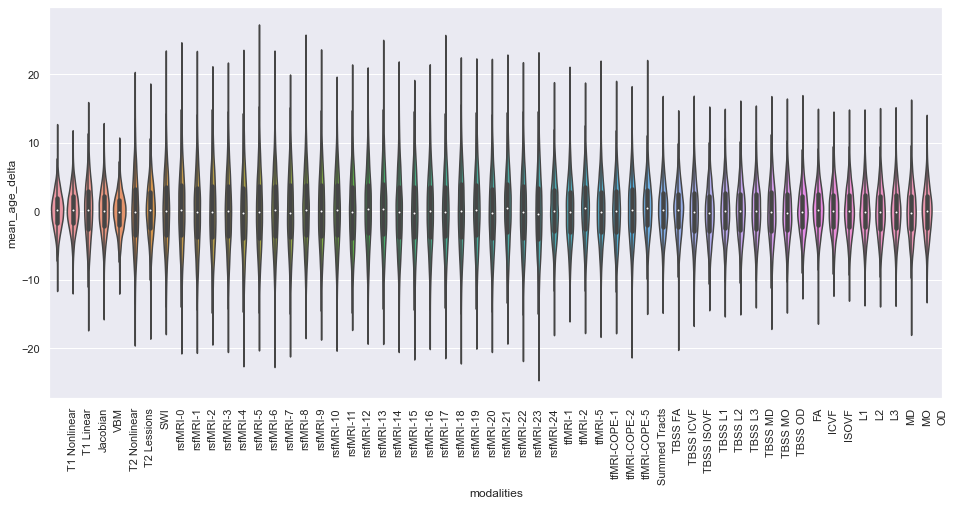

In [35]:
fig, axes = plt.subplots(figsize=(16, 7.2))
sns.violinplot(x=df_test.modalities, y=df_test.mean_age_delta, ax=axes)
axes.set_xticks(np.arange(1, len(modality_names)+1), modality_names , rotation=90);

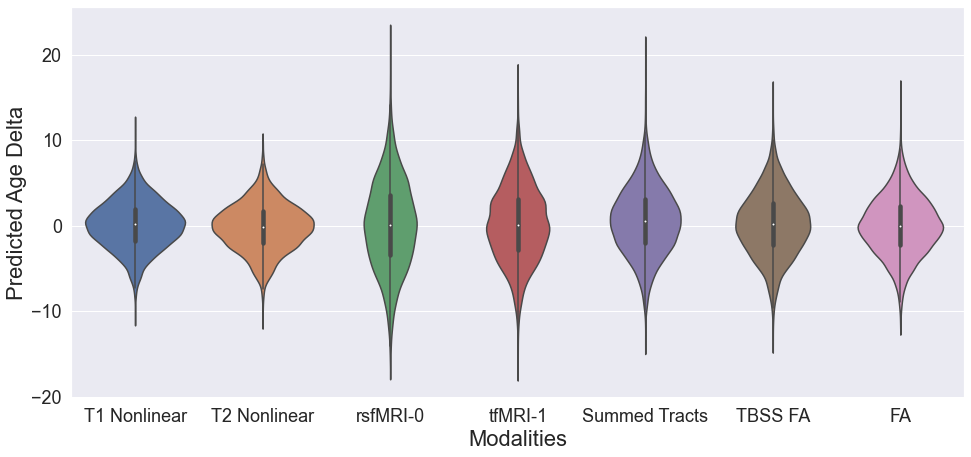

In [36]:
title_font_size=22
ticks_font_size=18
legend_font = 18

fig, axes = plt.subplots(figsize=(16, 7.2))
g = sns.violinplot(x=df_test.modalities[(df_test.modalities == 'T1 Nonlinear') |
                                    (df_test.modalities == 'T2 Nonlinear') |
                                    (df_test.modalities == 'rsfMRI-0') |
                                    (df_test.modalities == 'tfMRI-1') |
                                    (df_test.modalities == 'Summed Tracts') |
                                    (df_test.modalities == 'FA') |
                                    (df_test.modalities == 'TBSS FA') 
                                   ]
                                    , y=df_test.mean_age_delta, ax=axes)




# g.set_axis_labels('Count', 'Brain Age Deltas', fontsize=ticks_font_size)

# g.set_xticklabels(size = ticks_font_size)
# g.set_yticklabels(size = ticks_font_size)

# g.fig.suptitle("Female Subjects - ICA Separating Matrix Components", fontsize=title_font_size)


g.set_xlabel('Modalities', fontsize=title_font_size)
g.set_ylabel('Predicted Age Delta', fontsize=title_font_size)
g.tick_params(labelsize=ticks_font_size)

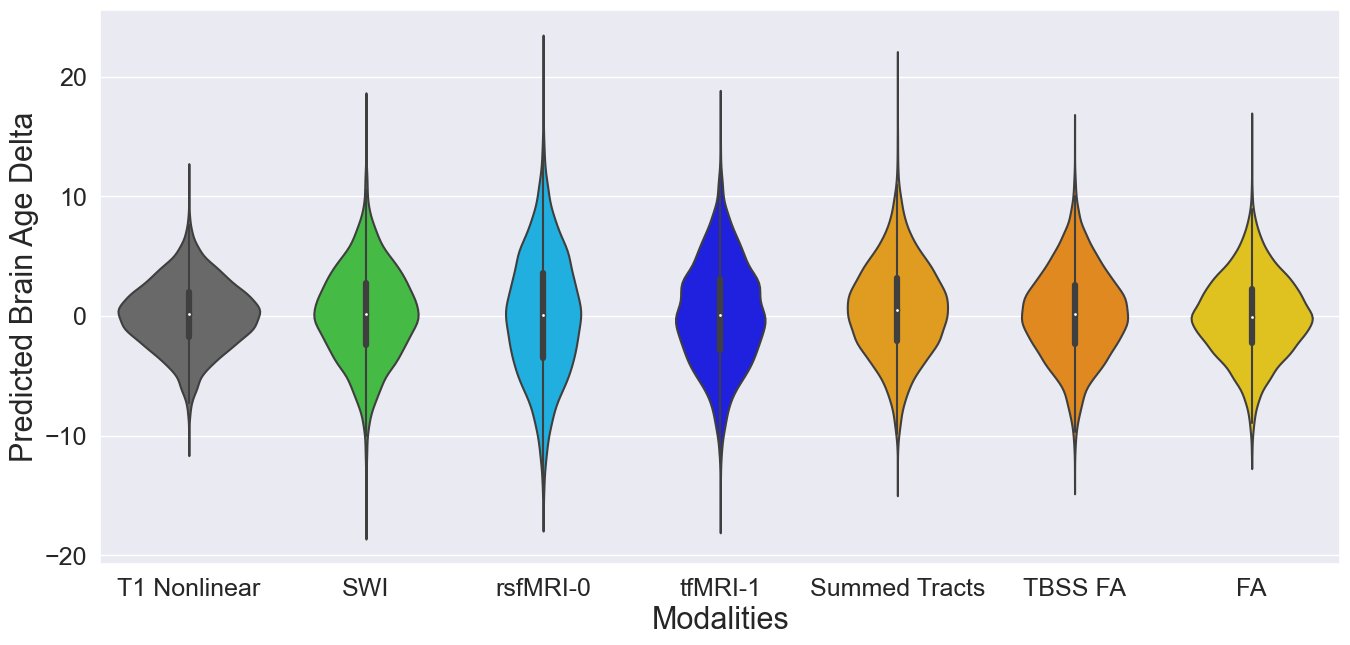

In [9]:
title_font_size=22
ticks_font_size=18
legend_font = 18

fig, axes = plt.subplots(figsize=(16, 7.2))

# my_pal = {"T1 Nonlinear": "gray", "SWI": "green", "rsfMRI-0": "lightblue", 'tfMRI-1':'blue', 
#           'Summed Tracts': 'orange', 'FA':'orange', 'TBSS FA': 'orange'}

my_pal = ["dimgray", "limegreen", "deepskyblue", 'blue', 'orange', 'darkorange','gold']

g = sns.violinplot(x=df_test.modalities[(df_test.modalities == 'T1 Nonlinear') |
                                    (df_test.modalities == 'SWI') |
                                    (df_test.modalities == 'rsfMRI-0') |
                                    (df_test.modalities == 'tfMRI-1') |
                                    (df_test.modalities == 'Summed Tracts') |
                                    (df_test.modalities == 'FA') |
                                    (df_test.modalities == 'TBSS FA') 
                                   ]
                                    , y=df_test.mean_age_delta, ax=axes, palette=my_pal)




# g.set_axis_labels('Count', 'Brain Age Deltas', fontsize=ticks_font_size)

# g.set_xticklabels(size = ticks_font_size)
# g.set_yticklabels(size = ticks_font_size)

# g.fig.suptitle("Female Subjects - ICA Separating Matrix Components", fontsize=title_font_size)


g.set_xlabel('Modalities', fontsize=title_font_size)
g.set_ylabel('Predicted Brain Age Delta', fontsize=title_font_size)
g.tick_params(labelsize=ticks_font_size)

# plt.scatter(np.arange(1, 7), MAEsNN[0:6], c='dimgray', label='sMRI')
# plt.scatter(np.arange(7, 8), MAEsNN[6:7], c='limegreen', label='swMRI')
# plt.scatter(np.arange(8, 33), MAEsNN[7:32], c='deepskyblue', label='rsfMRI')
# plt.scatter(np.arange(33, 39), MAEsNN[32:38], c='blue', label='tfMRI')
# plt.scatter(np.arange(39, 58), MAEsNN[38:], c='orange', label='dMRI')



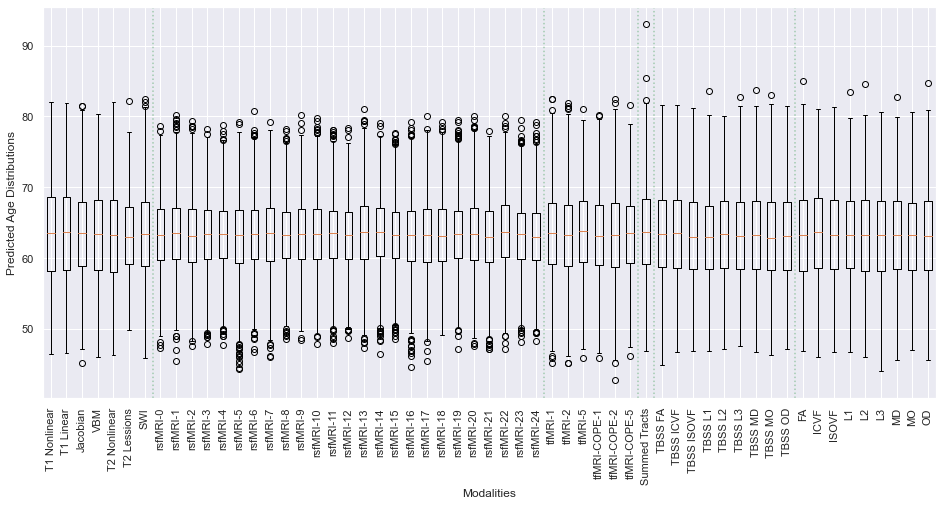

In [37]:
df_test = {}
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.mean_output_age.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)

array = np.array(df_test)

fig = plt.figure(figsize=(16, 7.2))
plt.boxplot(array);
# sns.violinplot(array, axis=1)
plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

plt.xlabel("Modalities")
plt.ylabel("Predicted Age Distributions")
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);

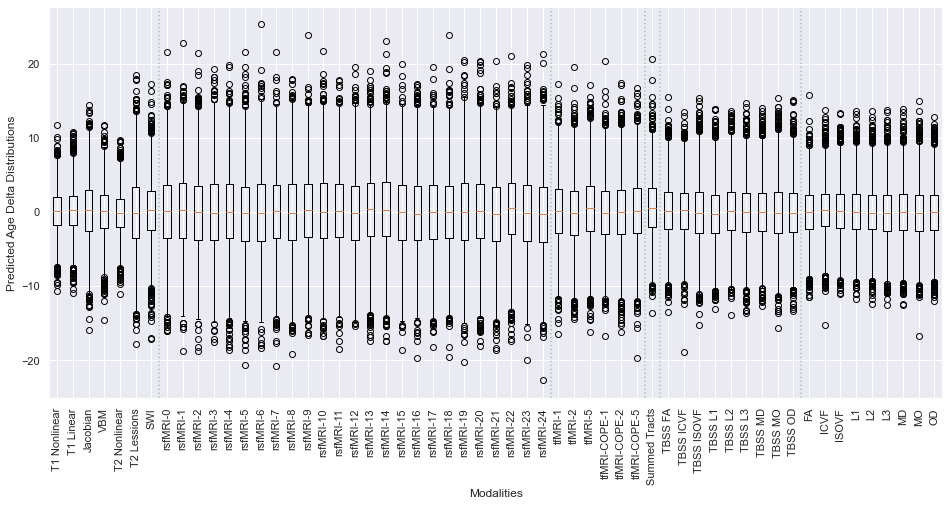

In [38]:
df_test = {}
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.mean_age_delta.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)

array = np.array(df_test)

fig = plt.figure(figsize=(16, 7.2))
plt.boxplot(array);
plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

plt.xlabel("Modalities")
plt.ylabel("Predicted Age Delta Distributions")
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);

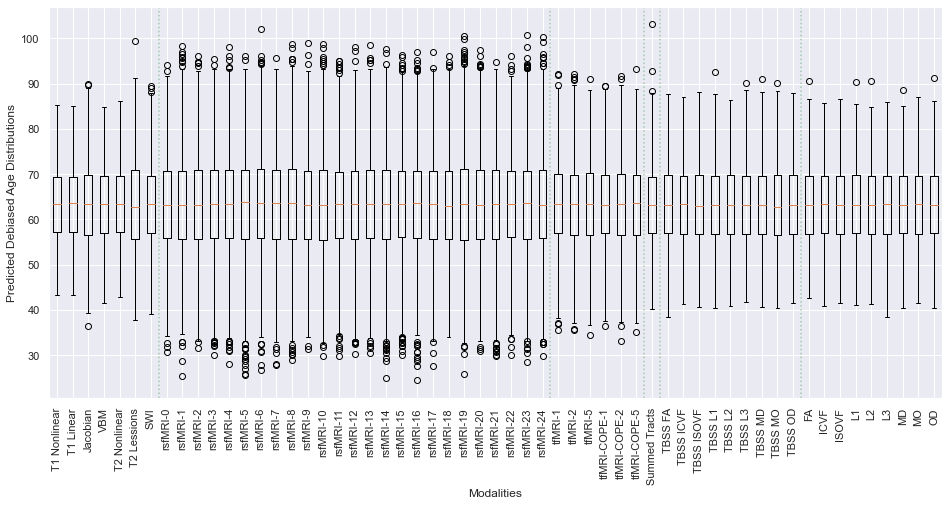

In [39]:
df_test = {}
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.output_age_decon.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)

array = np.array(df_test)

fig = plt.figure(figsize=(16, 7.2))
plt.boxplot(array);
plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

plt.xlabel("Modalities")
plt.ylabel("Predicted Debiased Age Distributions")
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);

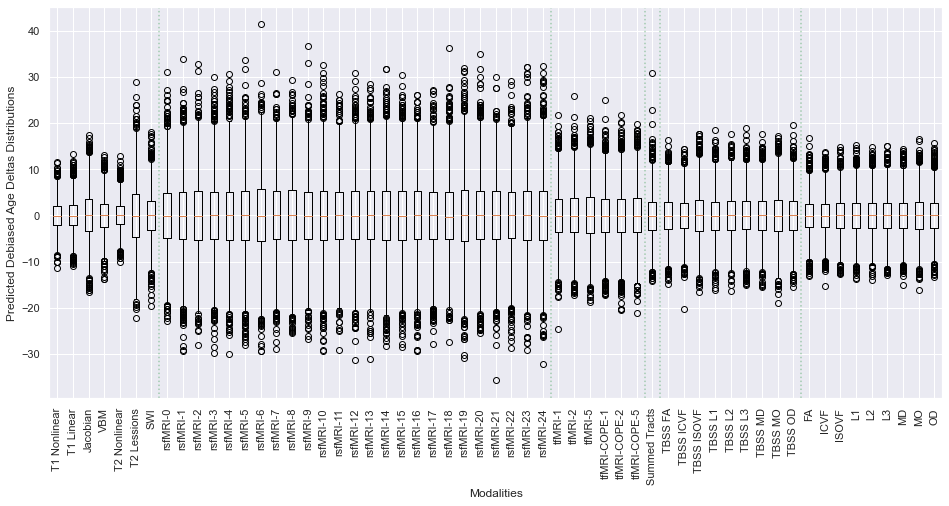

In [40]:
df_test = {}
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.age_delta_decon.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)

array = np.array(df_test)

fig = plt.figure(figsize=(16, 7.2))
plt.boxplot(array);
plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

plt.xlabel("Modalities")
plt.ylabel("Predicted Debiased Age Deltas Distributions")
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);

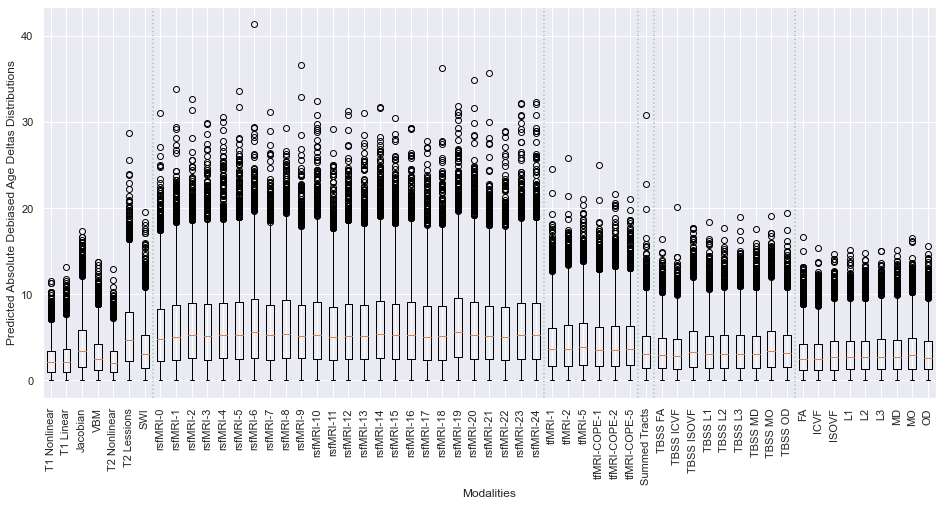

In [41]:
df_test = {}
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.age_delta_decon.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)

array = np.abs(np.array(df_test))

fig = plt.figure(figsize=(16, 7.2))
plt.boxplot(array);
plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

plt.xlabel("Modalities")
plt.ylabel("Predicted Absolute Debiased Age Deltas Distributions")
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);

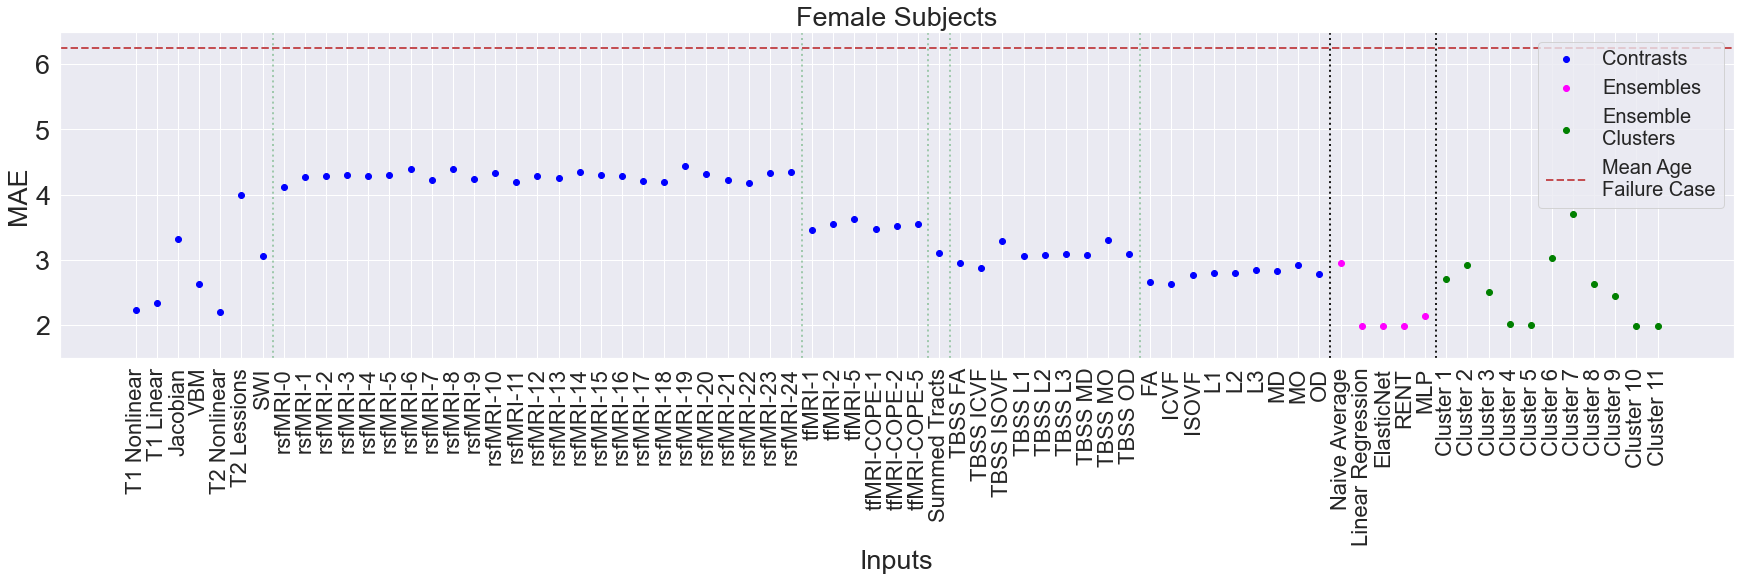

In [53]:
df = pd.read_pickle('female_test.pkl')

MAEsIDP = [
2.958,
1.991,
1.986,
1.987,
2.134,]
# namesIDPs = df.modality.to_list()
namesIDPs = ['Naive Average',
'Linear Regression',
'ElasticNet',
'RENT',
'MLP']

MAEs2 = [
    2.713,
    2.927,
    2.504,
    2.010,
    1.998,
    3.023,
    3.695,
    2.634,
    2.447,
    1.986,
    1.982
]

names2 = [
    'Cluster 1',
    'Cluster 2',
    'Cluster 3',
    'Cluster 4',
    'Cluster 5',
    'Cluster 6',
    'Cluster 7',
    'Cluster 8',
    'Cluster 9',
    'Cluster 10',
    'Cluster 11'
]

    
MAEsNN = []
# namesNN = dfNN.modality.to_list()
namesNN = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]
for idx in range(len(df)):
    data = df.iloc[idx].dataframe.mean_age_delta.to_list()
    MAEsNN.append(np.abs(np.array(data)).mean())
    
# df_test = pd.DataFrame.from_dict(df_test)

MAEs = MAEsNN + MAEsIDP + MAEs2
names = namesNN + namesIDPs + names2

MAEsIDP = np.array(MAEsIDP)
MAEsNN = np.array(MAEsNN)
MAEs2 = np.array(MAEs2)

namesIDPs = np.array(namesIDPs)
namesNN = np.array(namesNN)
names2 = np.array(names2)

MAEs = np.array(MAEs)
names = np.array(names)

col =[]

for i in range(0, len(MAEs)):
    if i<=len(MAEsNN):
        col.append('blue')  
    else:
        col.append('magenta') 
        
title_font_size=27
ticks_font_size=27
legend_font = 20
figsize=(30, 6)

fig = plt.figure(figsize=figsize)

plt.scatter(np.arange(1, MAEsNN.shape[0]+1), MAEsNN, c='blue', label='Contrasts')
plt.scatter(np.arange(MAEsNN.shape[0]+1, MAEsNN.shape[0]+MAEsIDP.shape[0]+1), MAEsIDP, c='magenta', label='Ensembles')
plt.scatter(np.arange(MAEsNN.shape[0]+MAEsIDP.shape[0]+1, 
                      MAEsNN.shape[0]+MAEsIDP.shape[0]+MAEs2.shape[0]+1),
            MAEs2, c='green', label='Ensemble\nClusters')
plt.xticks(np.arange(1, MAEs.shape[0]+1), names, rotation=90,fontsize= ticks_font_size-5 );
plt.yticks(fontsize= ticks_font_size)
plt.xlabel("Inputs", fontsize=title_font_size)
plt.ylabel("MAE", fontsize=title_font_size)
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axhline(y=6.253, color='r', linestyle='dashed', label='Mean Age\nFailure Case', linewidth=2)
plt.axvline(x=57.5, color='k', linestyle='dotted', linewidth=2);
plt.axvline(x=62.5, color='k', linestyle='dotted', linewidth=2);
# plt.axvline(x=58.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=65.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=67.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=68.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);

plt.legend(loc=1, fontsize=legend_font)

plt.ylim([1.5, 6.5])
plt.title('Female Subjects', fontsize=title_font_size)

fig.savefig('Female_MAE_ensemble_predictions.png', bbox_inches='tight')

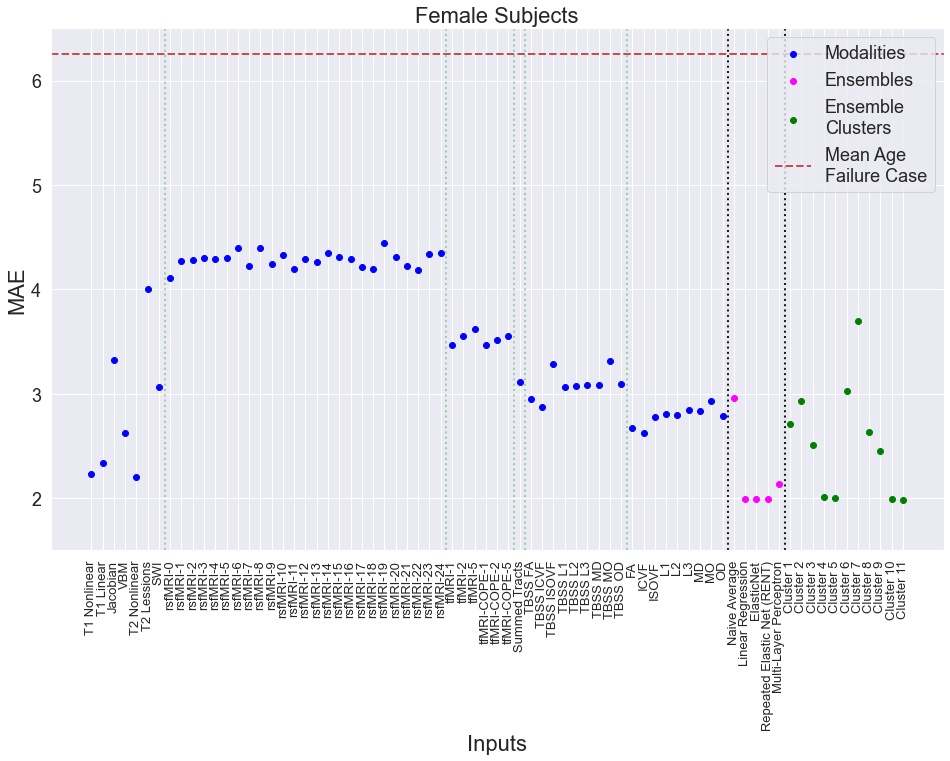

In [43]:
df = pd.read_pickle('female_test.pkl')

MAEsIDP = [
2.958,
1.991,
1.986,
1.987,
2.134,]
# namesIDPs = df.modality.to_list()
namesIDPs = ['Naive Average',
'Linear Regression',
'ElasticNet',
'Repeated Elastic Net (RENT)',
'Multi-Layer Perceptron']

MAEs2 = [
    2.713,
    2.927,
    2.504,
    2.010,
    1.998,
    3.023,
    3.695,
    2.634,
    2.447,
    1.986,
    1.982
]

names2 = [
    'Cluster 1',
    'Cluster 2',
    'Cluster 3',
    'Cluster 4',
    'Cluster 5',
    'Cluster 6',
    'Cluster 7',
    'Cluster 8',
    'Cluster 9',
    'Cluster 10',
    'Cluster 11'
]

    
MAEsNN = []
# namesNN = dfNN.modality.to_list()
namesNN = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]
for idx in range(len(df)):
    data = df.iloc[idx].dataframe.mean_age_delta.to_list()
    MAEsNN.append(np.abs(np.array(data)).mean())
    
# df_test = pd.DataFrame.from_dict(df_test)

MAEs = MAEsNN + MAEsIDP + MAEs2
names = namesNN + namesIDPs + names2

MAEsIDP = np.array(MAEsIDP)
MAEsNN = np.array(MAEsNN)
MAEs2 = np.array(MAEs2)

namesIDPs = np.array(namesIDPs)
namesNN = np.array(namesNN)
names2 = np.array(names2)

MAEs = np.array(MAEs)
names = np.array(names)

col =[]

for i in range(0, len(MAEs)):
    if i<=len(MAEsNN):
        col.append('blue')  
    else:
        col.append('magenta') 
        
title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize)

plt.scatter(np.arange(1, MAEsNN.shape[0]+1), MAEsNN, c='blue', label='Modalities')
plt.scatter(np.arange(MAEsNN.shape[0]+1, MAEsNN.shape[0]+MAEsIDP.shape[0]+1), MAEsIDP, c='magenta', label='Ensembles')
plt.scatter(np.arange(MAEsNN.shape[0]+MAEsIDP.shape[0]+1, 
                      MAEsNN.shape[0]+MAEsIDP.shape[0]+MAEs2.shape[0]+1),
            MAEs2, c='green', label='Ensemble\nClusters')
plt.xticks(np.arange(1, MAEs.shape[0]+1), names, rotation=90,fontsize= ticks_font_size-5 );
plt.yticks(fontsize= ticks_font_size)
plt.xlabel("Inputs", fontsize=title_font_size)
plt.ylabel("MAE", fontsize=title_font_size)
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axhline(y=6.253, color='r', linestyle='dashed', label='Mean Age\nFailure Case', linewidth=2)
plt.axvline(x=57.5, color='k', linestyle='dotted', linewidth=2);
plt.axvline(x=62.5, color='k', linestyle='dotted', linewidth=2);
# plt.axvline(x=58.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=65.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=67.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=68.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);

plt.legend(loc=1, fontsize=legend_font)

plt.ylim([1.5, 6.5])
plt.title('Female Subjects', fontsize=title_font_size)

fig.savefig('Female_MAE_ensemble_predictions.png', bbox_inches='tight')

Text(0.5, 1.0, 'Female Subjects')

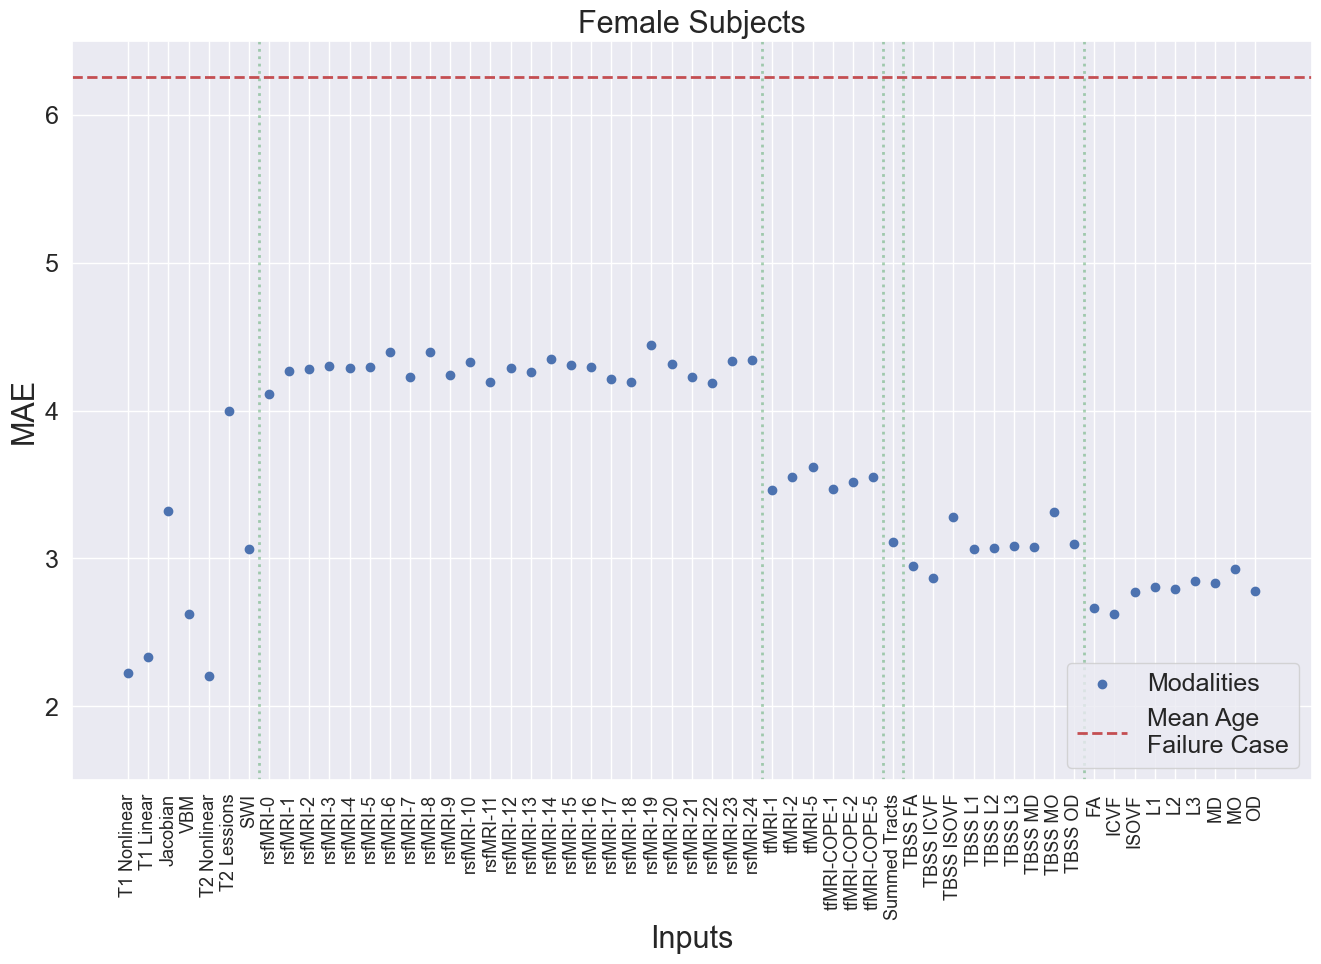

In [24]:
MAEsNN = []
# namesNN = dfNN.modality.to_list()
namesNN = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]
for idx in range(len(df)):
    data = df.iloc[idx].dataframe.mean_age_delta.to_list()
    MAEsNN.append(np.abs(np.array(data)).mean())
    
# df_test = pd.DataFrame.from_dict(df_test)

MAEs = MAEsNN
names = namesNN

MAEsNN = np.array(MAEsNN)

namesNN = np.array(namesNN)

MAEs = np.array(MAEs)
names = np.array(names)

# col =[]

# for i in range(0, len(MAEs)):
#     if i<=len(MAEsNN):
#         col.append('blue')  
#     else:
#         col.append('magenta') 
        
title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize)

plt.scatter(np.arange(1, MAEsNN.shape[0]+1), MAEsNN, label='Modalities')
# plt.scatter(np.arange(MAEsNN.shape[0]+1, MAEsNN.shape[0]+MAEsIDP.shape[0]+1), MAEsIDP, c='magenta', label='IDPs')
plt.xticks(np.arange(1, MAEs.shape[0]+1), names, rotation=90,fontsize= ticks_font_size-5 );
plt.yticks(fontsize= ticks_font_size)
plt.xlabel("Inputs", fontsize=title_font_size)
plt.ylabel("MAE", fontsize=title_font_size)
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axhline(y=6.253, color='r', linestyle='dashed', label='Mean Age\nFailure Case', linewidth=2)
# plt.axvline(x=57.5, color='k', linestyle='dotted', linewidth=2);
# plt.axvline(x=58.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=65.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=67.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=68.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);

plt.legend(loc=4, fontsize=legend_font)

plt.ylim([1.5, 6.5])
plt.title('Female Subjects', fontsize=title_font_size)

# fig.savefig('Female_MAE_predictions.png', bbox_inches='tight')


Text(0.5, 1.0, 'Female Subjects')

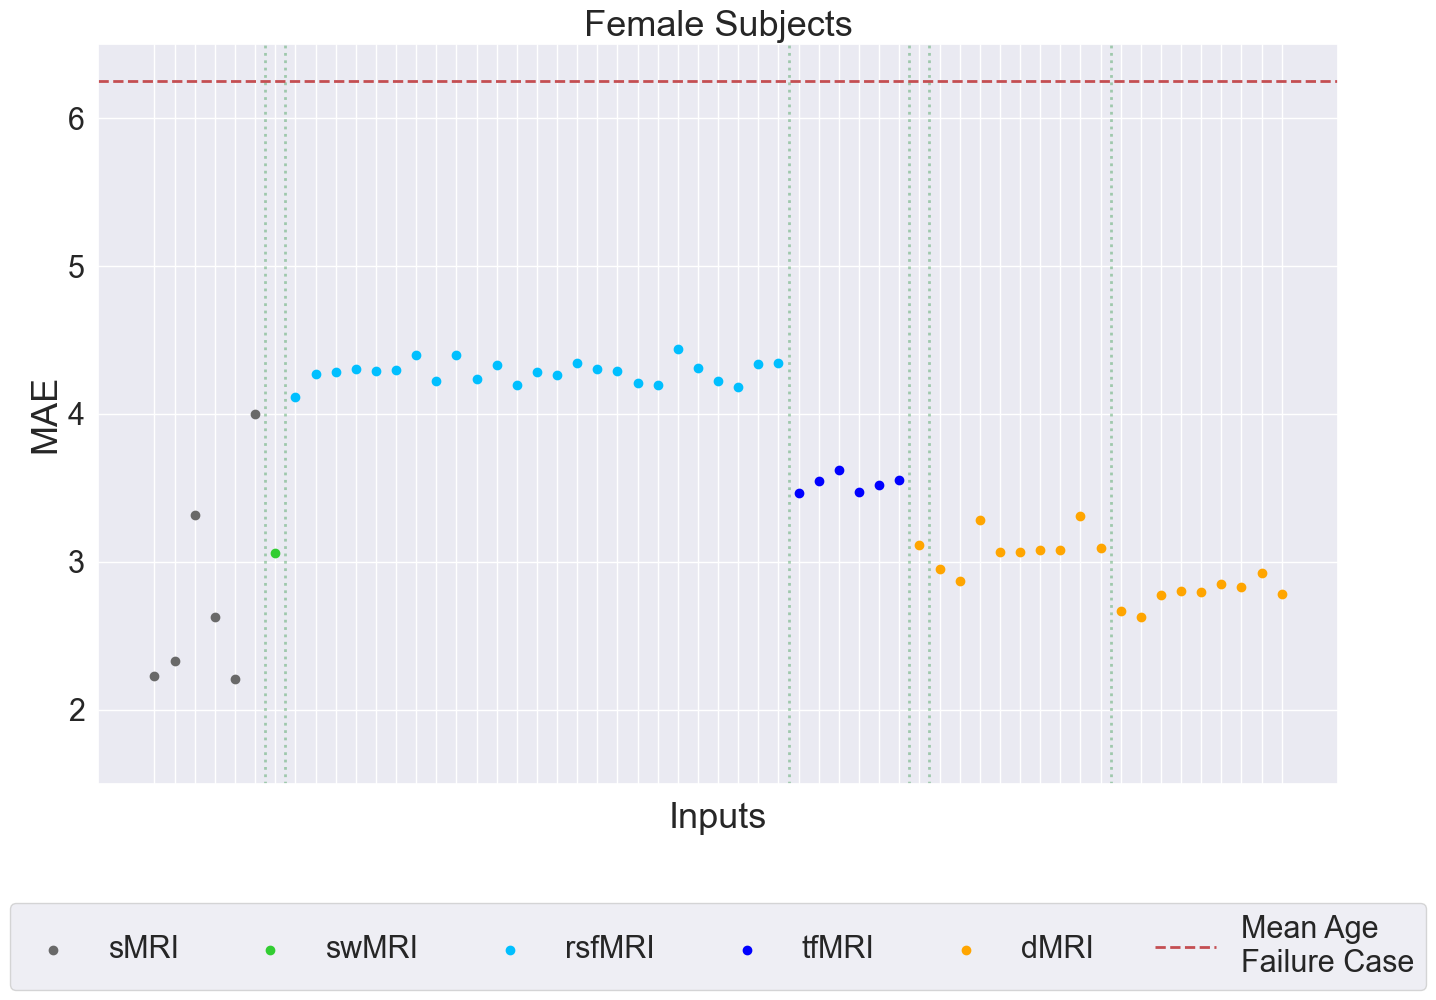

In [47]:
MAEsNN = []
# namesNN = dfNN.modality.to_list()
namesNN = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]
for idx in range(len(df)):
    data = df.iloc[idx].dataframe.mean_age_delta.to_list()
    MAEsNN.append(np.abs(np.array(data)).mean())
    
# df_test = pd.DataFrame.from_dict(df_test)

MAEs = MAEsNN
names = namesNN

MAEsNN = np.array(MAEsNN)

namesNN = np.array(namesNN)

MAEs = np.array(MAEs)
names = np.array(names)

# col =[]

# for i in range(0, len(MAEs)):
#     if i<=len(MAEsNN):
#         col.append('blue')  
#     else:
#         col.append('magenta') 
        
title_font_size=26
ticks_font_size=22
legend_font = 22
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize)

plt.scatter(np.arange(1, 7), MAEsNN[0:6], c='dimgray', label='sMRI')
plt.scatter(np.arange(7, 8), MAEsNN[6:7], c='limegreen', label='swMRI')
plt.scatter(np.arange(8, 33), MAEsNN[7:32], c='deepskyblue', label='rsfMRI')
plt.scatter(np.arange(33, 39), MAEsNN[32:38], c='blue', label='tfMRI')
plt.scatter(np.arange(39, 58), MAEsNN[38:], c='orange', label='dMRI')
# plt.scatter(np.arange(MAEsNN.shape[0]+1, MAEsNN.shape[0]+MAEsIDP.shape[0]+1), MAEsIDP, c='magenta', label='IDPs')
plt.xticks(np.arange(1, MAEs.shape[0]+1), [], rotation=90,fontsize= ticks_font_size-5 );
plt.yticks(fontsize= ticks_font_size)
plt.xlabel("Inputs", fontsize=title_font_size)
plt.ylabel("MAE", fontsize=title_font_size)
plt.axvline(x=6.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axhline(y=6.253, color='r', linestyle='dashed', label='Mean Age\nFailure Case', linewidth=2)
# plt.axvline(x=57.5, color='k', linestyle='dotted', linewidth=2);
# plt.axvline(x=58.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=65.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=67.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=68.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);

# plt.legend(fontsize=legend_font, loc=(1.04, 0))
plt.legend(fontsize=legend_font, bbox_to_anchor=(0.5, -0.3), loc='lower center', ncol=6)

plt.ylim([1.5, 6.5])
plt.title('Female Subjects', fontsize=title_font_size)

# fig.savefig('Female_MAE_predictions.png', bbox_inches='tight')


NameError: name 'MAEsIDP' is not defined

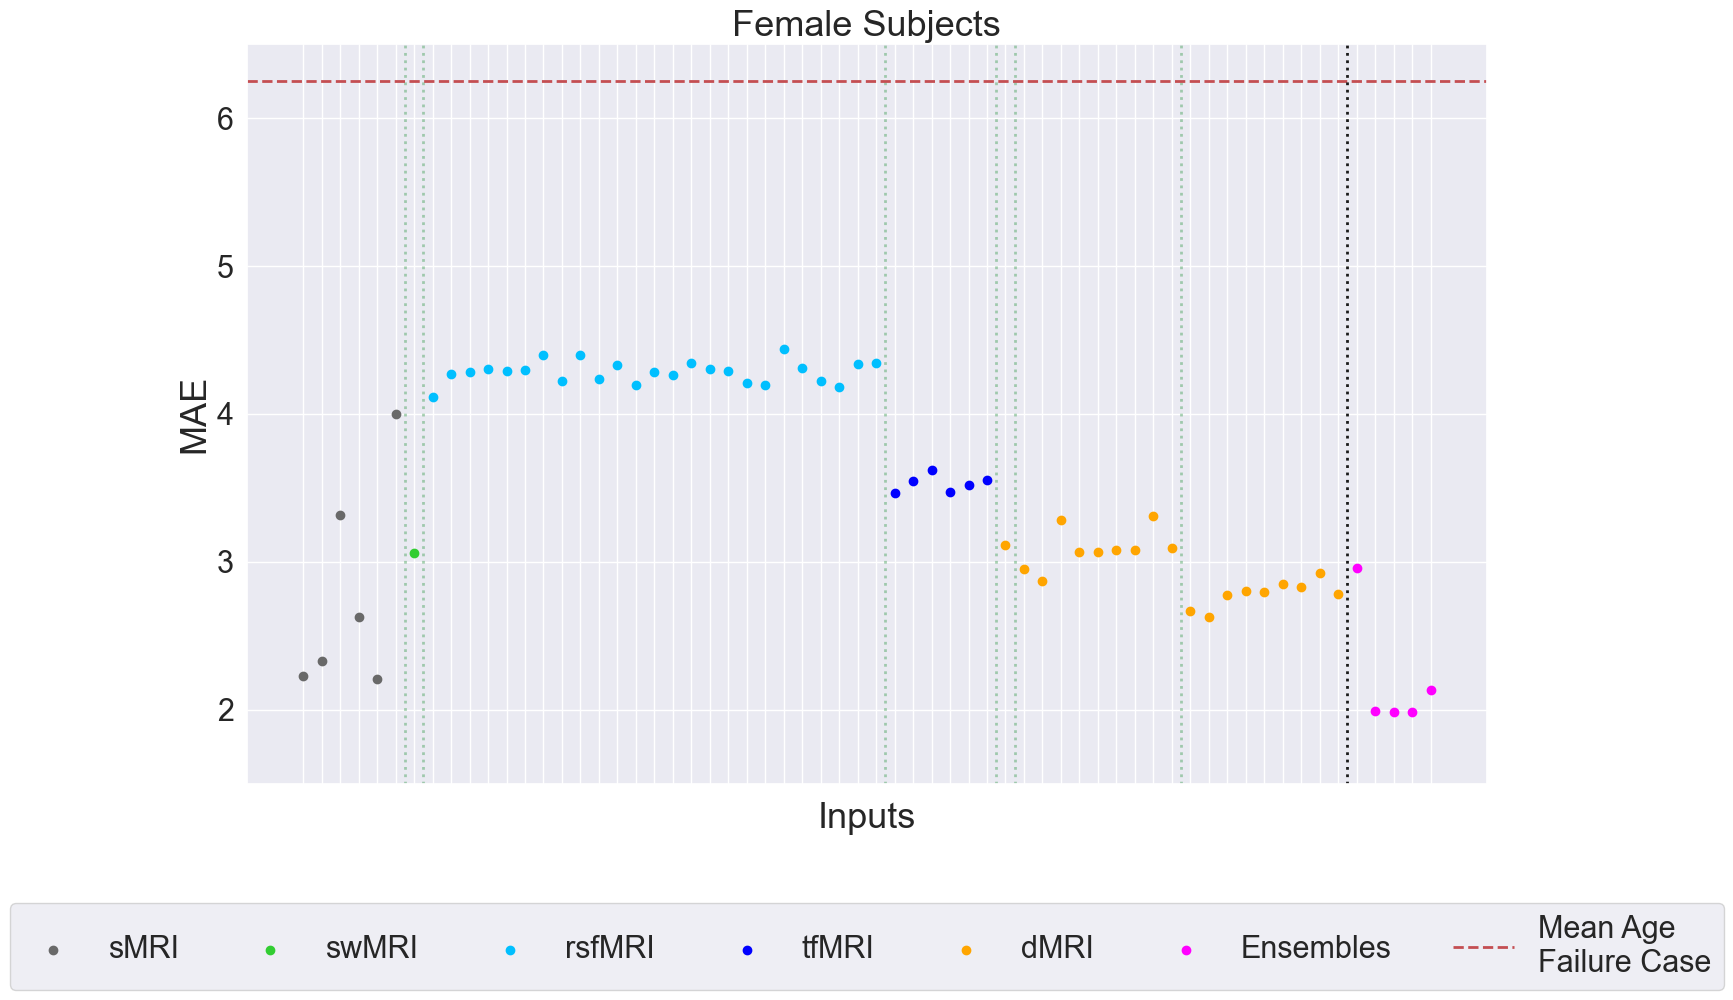

In [48]:
df = pd.read_pickle('female_test.pkl')

MAEsIDP = [
2.958,
1.991,
1.986,
1.987,
2.134,]
# namesIDPs = df.modality.to_list()
namesIDPs = ['Naive Average',
'Linear Regression',
'ElasticNet',
'Repeated Elastic Net (RENT)',
'Multi-Layer Perceptron']

    
MAEsNN = []
# namesNN = dfNN.modality.to_list()
namesNN = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]
for idx in range(len(df)):
    data = df.iloc[idx].dataframe.mean_age_delta.to_list()
    MAEsNN.append(np.abs(np.array(data)).mean())
    
# df_test = pd.DataFrame.from_dict(df_test)

MAEs = MAEsNN + MAEsIDP 
names = namesNN + namesIDPs

MAEsIDP = np.array(MAEsIDP)
MAEsNN = np.array(MAEsNN)


namesIDPs = np.array(namesIDPs)
namesNN = np.array(namesNN)


MAEs = np.array(MAEs)
names = np.array(names)

col =[]

for i in range(0, len(MAEs)):
    if i<=len(MAEsNN):
        col.append('blue')  
    else:
        col.append('magenta') 
        
title_font_size=26
ticks_font_size=22
legend_font = 22
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize)

plt.scatter(np.arange(1, 7), MAEsNN[0:6], c='dimgray', label='sMRI')
plt.scatter(np.arange(7, 8), MAEsNN[6:7], c='limegreen', label='swMRI')
plt.scatter(np.arange(8, 33), MAEsNN[7:32], c='deepskyblue', label='rsfMRI')
plt.scatter(np.arange(33, 39), MAEsNN[32:38], c='blue', label='tfMRI')
plt.scatter(np.arange(39, 58), MAEsNN[38:], c='orange', label='dMRI')
plt.scatter(np.arange(MAEsNN.shape[0]+1, MAEsNN.shape[0]+MAEsIDP.shape[0]+1), MAEsIDP, c='magenta', label='Ensembles')
# plt.scatter(np.arange(MAEsNN.shape[0]+MAEsIDP.shape[0]+1, 
#                       MAEsNN.shape[0]+MAEsIDP.shape[0]+MAEs2.shape[0]+1),
#             MAEs2, c='green', label='Ensemble\nClusters')
plt.xticks(np.arange(1, MAEs.shape[0]+1), [], rotation=90,fontsize= ticks_font_size-5 );
plt.yticks(fontsize= ticks_font_size)
plt.xlabel("Inputs", fontsize=title_font_size)
plt.ylabel("MAE", fontsize=title_font_size)
plt.axvline(x=6.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axhline(y=6.253, color='r', linestyle='dashed', label='Mean Age\nFailure Case', linewidth=2)
plt.axvline(x=57.5, color='k', linestyle='dotted', linewidth=2);
# plt.axvline(x=62.5, color='k', linestyle='dotted', linewidth=2);|
# plt.axvline(x=58.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=65.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=67.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=68.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);

# plt.legend(fontsize=legend_font, loc=(1.04, 0))
plt.legend(fontsize=legend_font, bbox_to_anchor=(0.5, -0.3), loc='lower center', ncol=7)

plt.ylim([1.5, 6.5])
plt.title('Female Subjects', fontsize=title_font_size)

fig.savefig('Female_MAE_ensemble_predictions.png', bbox_inches='tight')

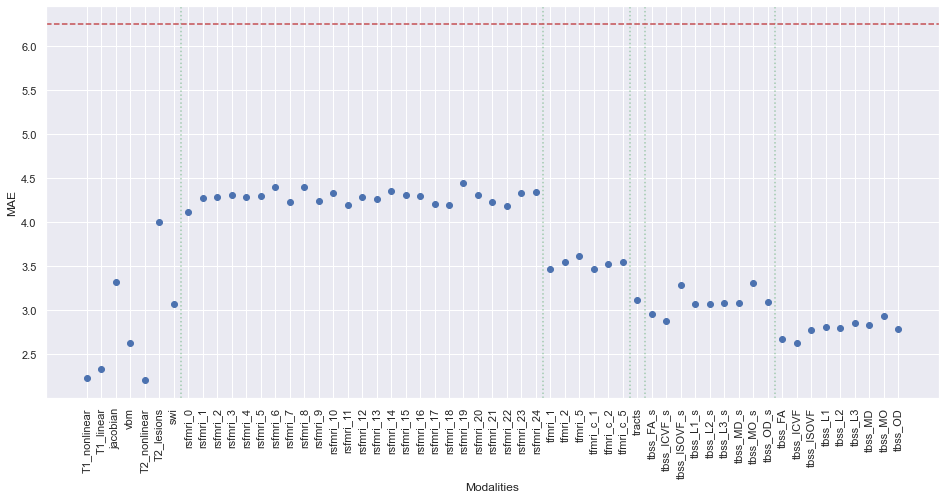

In [45]:
df_test = {}
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.mean_age_delta.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)

array = np.array(df_test)

fig = plt.figure(figsize=(16, 7.2))
# plt.scatter(np.arange(1, len(array), 1), array);
plt.scatter(np.arange(1, array.shape[1]+1), abs(array).mean(axis=0))
plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

plt.xlabel("Modalities")
plt.ylabel("MAE")
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);
plt.axhline(y=6.253, color='r', linestyle='dashed')

In [46]:
np.std(array, axis=0)

array([2.79566704, 2.93433072, 4.13862568, 3.28133737, 2.78327797,
       4.99699683, 3.86974206, 5.12024435, 5.28502687, 5.32810836,
       5.3156969 , 5.35501672, 5.36151252, 5.4488698 , 5.25657212,
       5.4256121 , 5.27179034, 5.37177446, 5.21194425, 5.3207078 ,
       5.3077288 , 5.40932631, 5.34666102, 5.33909729, 5.22882101,
       5.23910314, 5.49810489, 5.40281406, 5.24547553, 5.20927145,
       5.35368934, 5.37084897, 4.30811141, 4.41914255, 4.51655467,
       4.33485877, 4.41452929, 4.39990014, 3.86969922, 3.69886138,
       3.59600689, 4.11488728, 3.82855542, 3.84247181, 3.8877594 ,
       3.86357174, 4.13672117, 3.87159108, 3.36253654, 3.31550382,
       3.47831638, 3.52881695, 3.52240365, 3.56811592, 3.56190006,
       3.67595132, 3.49995327])

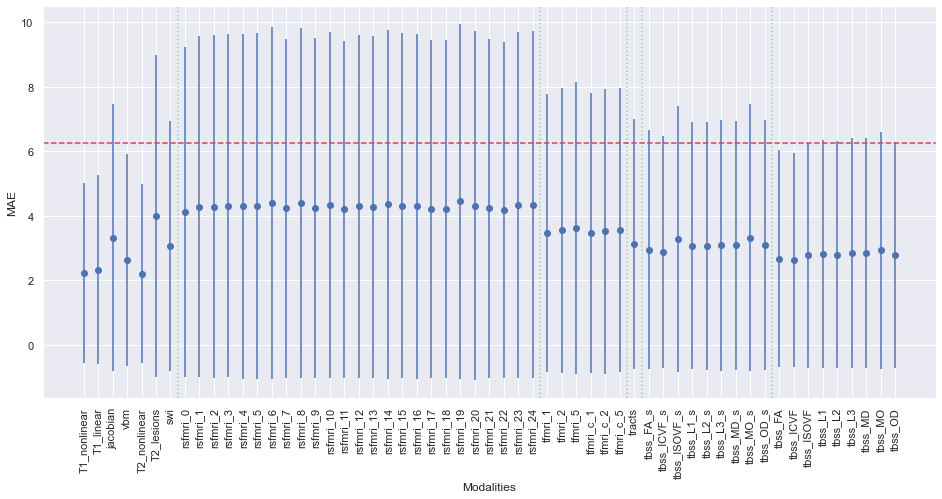

In [47]:
df_test = {}
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.mean_age_delta.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)

array = np.array(df_test)

fig = plt.figure(figsize=(16, 7.2))
# plt.scatter(np.arange(1, len(array), 1), array);
# plt.scatter(np.arange(1, array.shape[1]+1), abs(array).mean(axis=0))

plt.errorbar(np.arange(1, array.shape[1]+1), abs(array).mean(axis=0), yerr=np.std(array, axis=0), fmt='o',  linestyle='None')


plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

plt.xlabel("Modalities")
plt.ylabel("MAE")
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);
plt.axhline(y=6.253, color='r', linestyle='dashed')

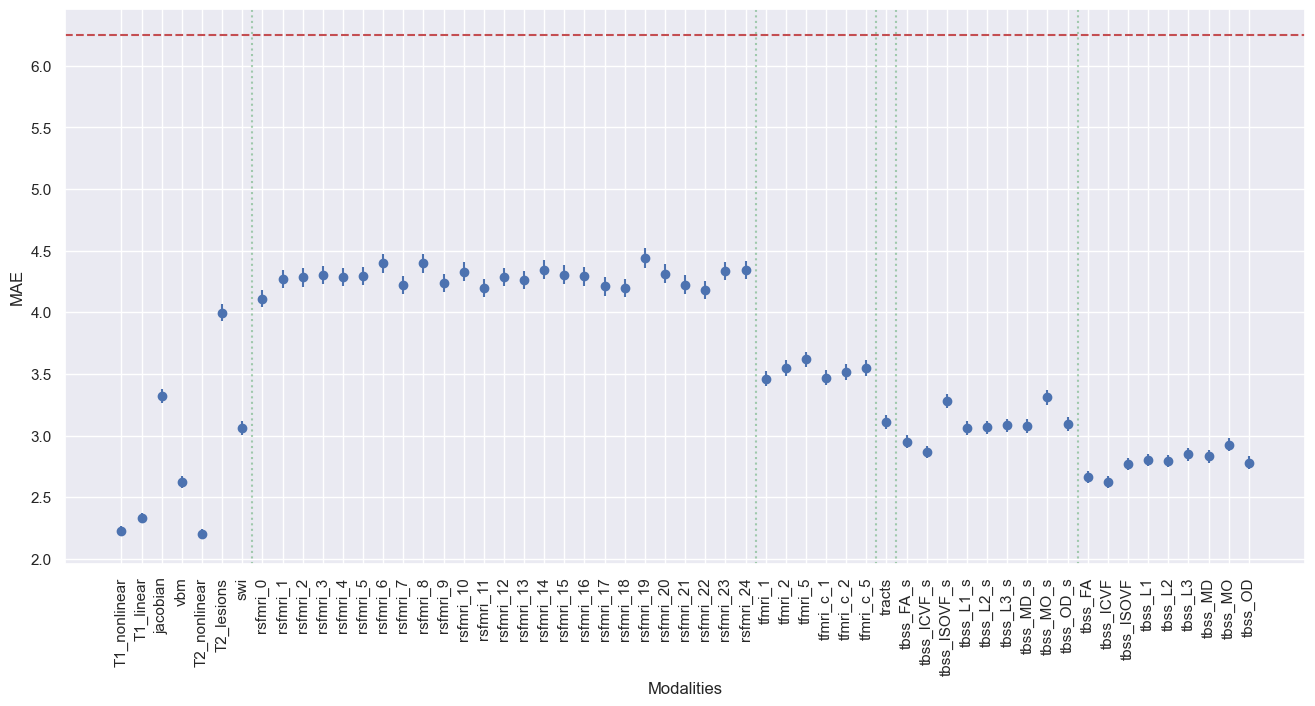

In [54]:
df_test = {}
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.mean_age_delta.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)

array = np.array(df_test)

fig = plt.figure(figsize=(16, 7.2))
# plt.scatter(np.arange(1, len(array), 1), array);
# plt.scatter(np.arange(1, array.shape[1]+1), abs(array).mean(axis=0))

plt.errorbar(np.arange(1, array.shape[1]+1), abs(array).mean(axis=0), yerr=np.std(array, axis=0)/np.sqrt(array.shape[0]), fmt='o',  linestyle='None')


plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

plt.xlabel("Modalities")
plt.ylabel("MAE")
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);
plt.axhline(y=6.253, color='r', linestyle='dashed')

In [57]:
print(np.arange(1, 7))
print(MAEsNN[0:6])
print(MAEserr[0:6])

[1 2 3 4 5 6]
[]
[0.03945001 0.04140671 0.05840067 0.04630336 0.03927518 0.07051325]


In [56]:
array

array([[-0.46670343,  1.57041323, -0.49816877, ...,  0.37692457,
         3.5011959 , -0.74553743],
       [-0.63180607, -1.57719407, -3.34957941, ..., -1.25429074,
        -1.00194107, -1.15365807],
       [-0.18134664, -0.89779397, -3.43438531, ...,  3.51889436,
        -1.68574764, -2.73997264],
       ...,
       [-0.63359776, -0.19048443, -4.3642551 , ..., -1.01543276,
         0.54495424, -2.84763843],
       [-2.43192251, -1.46342551, -2.66364251, ..., -6.55210051,
        -5.48682584, -8.67356918],
       [ 3.58056436,  3.57547436,  2.31710169, ...,  0.41442802,
         1.28872502,  1.18434236]])

Text(0.5, 1.0, 'Female Subjects')

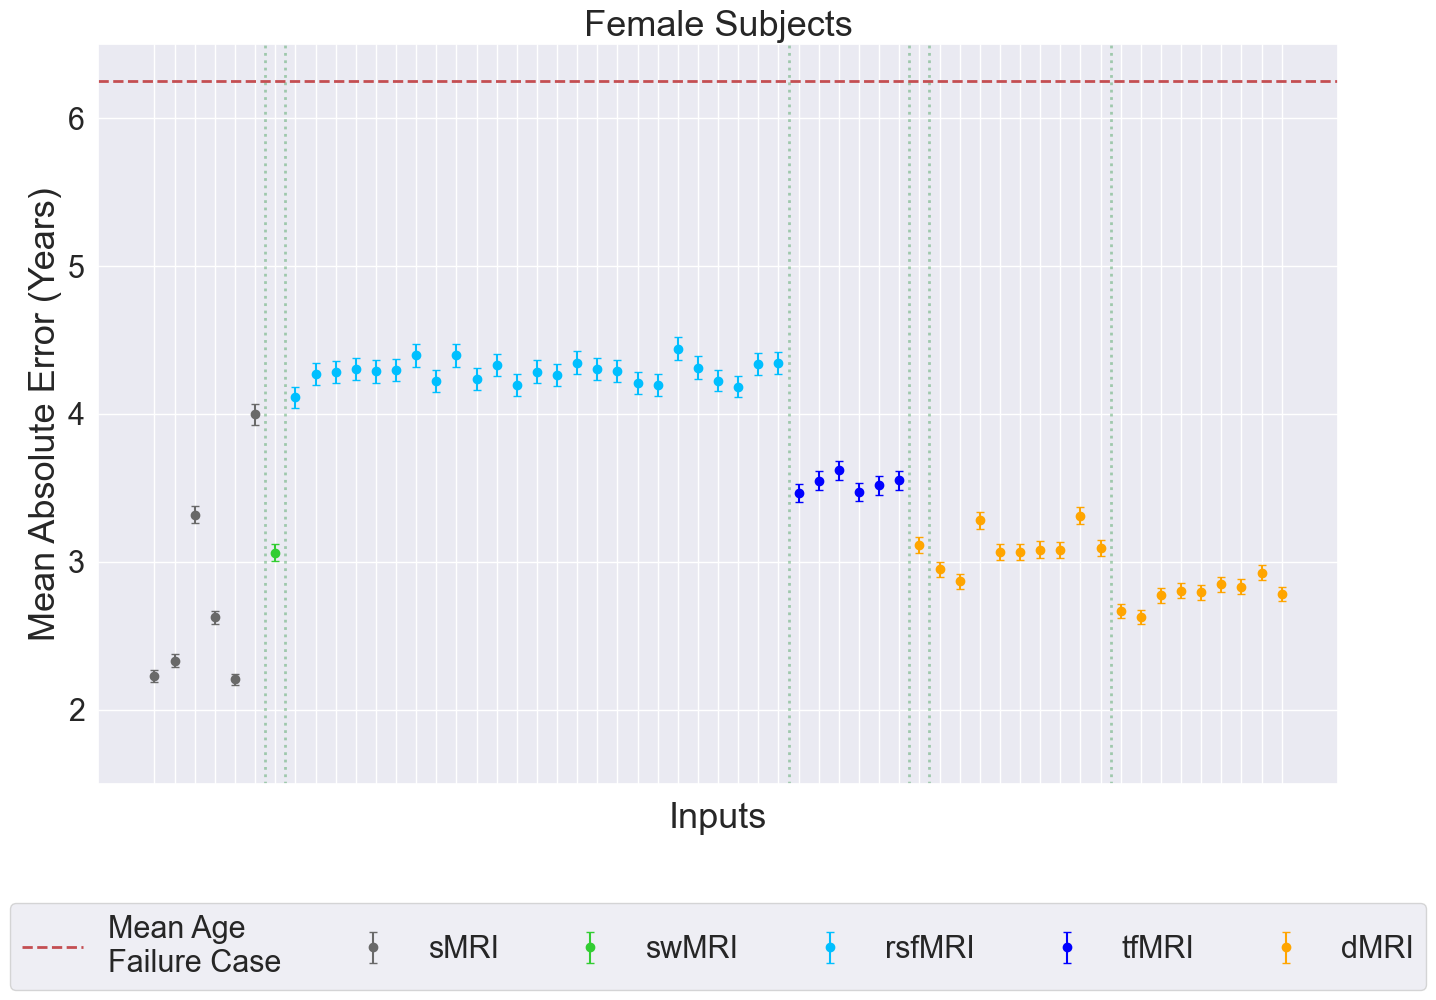

In [12]:
df_test = {}
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.mean_age_delta.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)

array = np.array(df_test)

MAEsNN = []
# namesNN = dfNN.modality.to_list()
namesNN = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]
# for idx in range(len(df)):
#     data = df.iloc[idx].dataframe.mean_age_delta.to_list()
#     MAEsNN.append(np.abs(np.array(data)).mean())
    
# df_test = pd.DataFrame.from_dict(df_test)

MAEsNN = abs(array).mean(axis=0)
MAEserr = np.std(array, axis=0)/np.sqrt(array.shape[0])
names = namesNN

MAEsNN = np.array(MAEsNN)

namesNN = np.array(namesNN)

# MAEs = np.array(MAEs)
names = np.array(names)

# col =[]

# for i in range(0, len(MAEs)):
#     if i<=len(MAEsNN):
#         col.append('blue')  
#     else:
#         col.append('magenta') 
        
title_font_size=26
ticks_font_size=22
legend_font = 22
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize)

plt.errorbar(np.arange(1, 7), MAEsNN[0:6], yerr=MAEserr[0:6], fmt='o',  
             linestyle='None', c='dimgray', label='sMRI', capsize=3)
plt.errorbar(np.arange(7 , 8), MAEsNN[6:7], yerr=MAEserr[6:7], fmt='o',  
             linestyle='None', c='limegreen', label='swMRI', capsize=3)
plt.errorbar(np.arange(8, 33), MAEsNN[7:32], yerr=MAEserr[7:32], fmt='o',  
             linestyle='None', c='deepskyblue', label='rsfMRI', capsize=3)
plt.errorbar(np.arange(33, 39), MAEsNN[32:38], yerr=MAEserr[32:38], fmt='o',  
             linestyle='None', c='blue', label='tfMRI', capsize=3)
plt.errorbar(np.arange(39, 58), MAEsNN[38:], yerr=MAEserr[38:], fmt='o',  
             linestyle='None', c='orange', label='dMRI', capsize=3)

# plt.scatter(np.arange(1, 7), MAEsNN[0:6], c='dimgray', label='sMRI')
# plt.scatter(np.arange(7, 8), MAEsNN[6:7], c='limegreen', label='swMRI')
# plt.scatter(np.arange(8, 33), MAEsNN[7:32], c='deepskyblue', label='rsfMRI')
# plt.scatter(np.arange(33, 39), MAEsNN[32:38], c='blue', label='tfMRI')
# plt.scatter(np.arange(39, 58), MAEsNN[38:], c='orange', label='dMRI')
# plt.scatter(np.arange(MAEsNN.shape[0]+1, MAEsNN.shape[0]+MAEsIDP.shape[0]+1), MAEsIDP, c='magenta', label='IDPs')
plt.xticks(np.arange(1, MAEsNN.shape[0]+1), [], rotation=90,fontsize= ticks_font_size-5 );
plt.yticks(fontsize= ticks_font_size)
plt.xlabel("Inputs", fontsize=title_font_size)
plt.ylabel("Mean Absolute Error (Years)", fontsize=title_font_size)
plt.axvline(x=6.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axhline(y=6.253, color='r', linestyle='dashed', label='Mean Age\nFailure Case', linewidth=2)
# plt.axvline(x=57.5, color='k', linestyle='dotted', linewidth=2);
# plt.axvline(x=58.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=65.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=67.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=68.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);

# plt.legend(fontsize=legend_font, loc=(1.04, 0))
plt.legend(fontsize=legend_font, bbox_to_anchor=(0.5, -0.3), loc='lower center', ncol=6)

plt.ylim([1.5, 6.5])
plt.title('Female Subjects', fontsize=title_font_size)

# fig.savefig('Female_MAE_predictions.png', bbox_inches='tight')


In [78]:
# !ls 

In [77]:
# df.iloc[0].dataframe

In [96]:
dfi = pd.read_pickle('female_ensembles_testset.pkl')
dfi.modality

0               NaiveFull
0    LinearRegressionFull
0          ElasticNetFull
0                Cluster1
0                Cluster2
0                Cluster3
0                Cluster4
0                Cluster5
0                Cluster6
0                Cluster7
0                Cluster8
0                Cluster9
0               Cluster10
0               Cluster11
0                    RENT
0                     MLP
Name: modality, dtype: object

In [98]:
dfi = dfi.loc[(dfi['modality'] == 'NaiveFull') | 
              (dfi['modality'] == 'LinearRegressionFull') |
              (dfi['modality'] == 'ElasticNetFull') | 
              (dfi['modality'] == 'RENT') |
              (dfi['modality'] == 'MLP') 
             ]

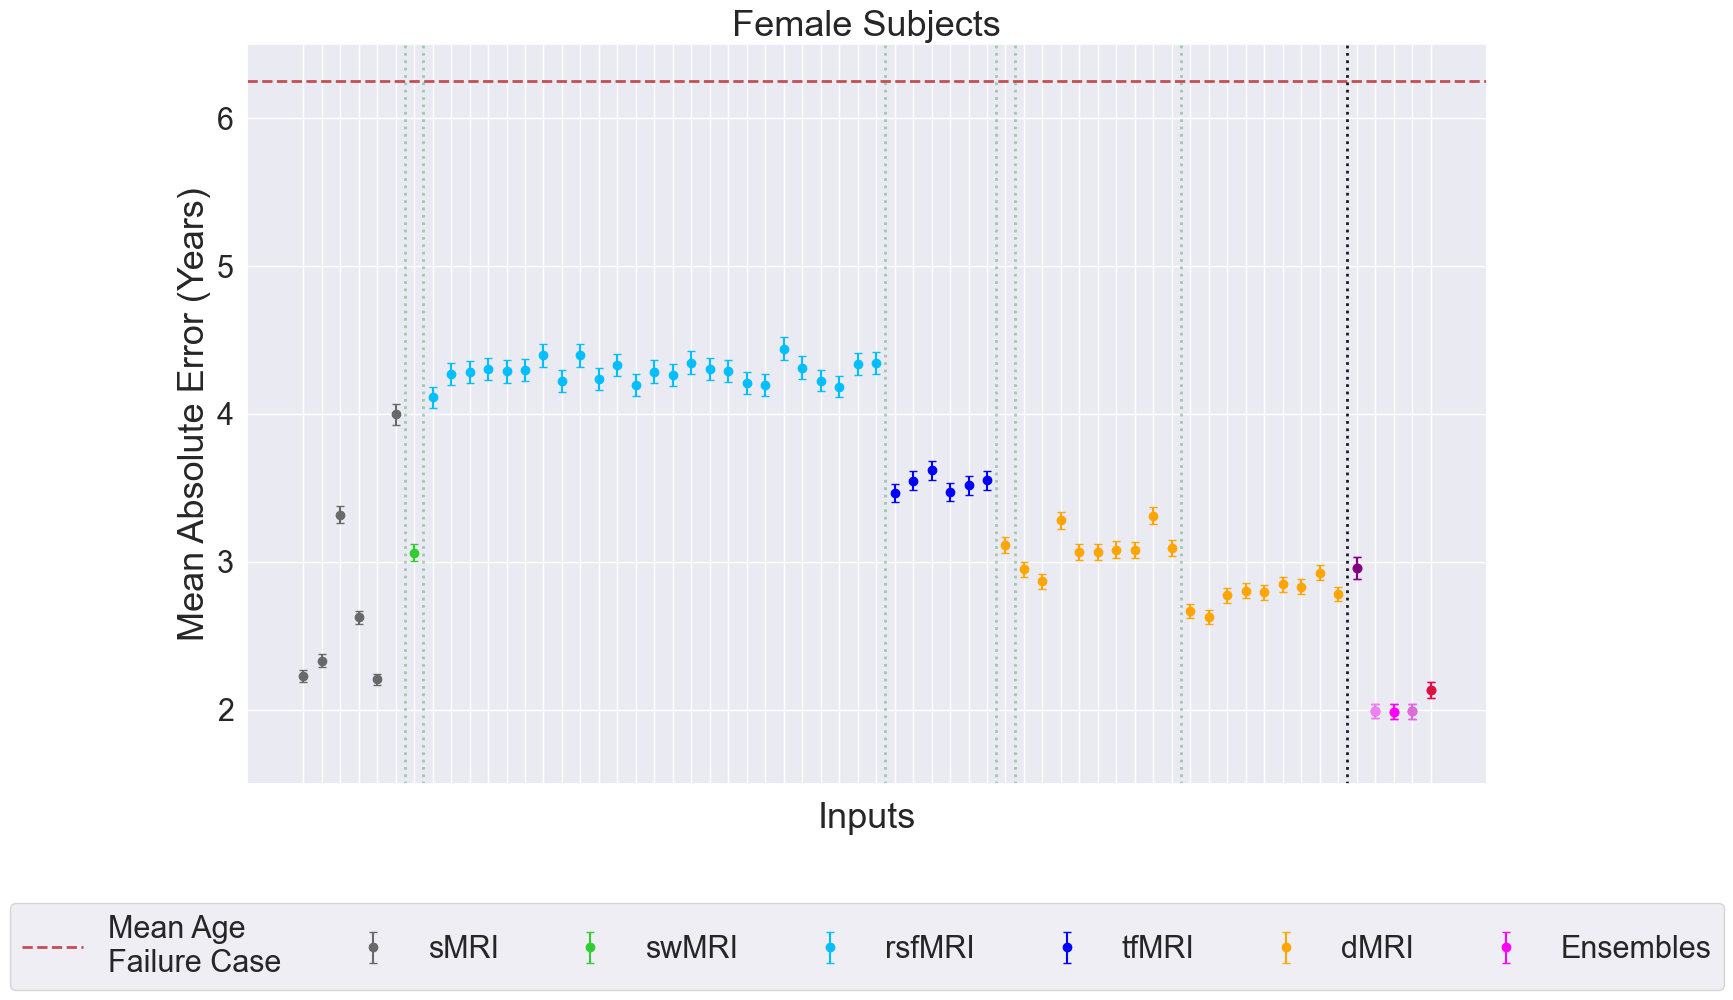

In [15]:
df = pd.read_pickle('female_test.pkl')
dfi = pd.read_pickle('female_ensembles_testset.pkl')

dfi = dfi.loc[(dfi['modality'] == 'NaiveFull') | 
              (dfi['modality'] == 'LinearRegressionFull') |
              (dfi['modality'] == 'ElasticNetFull') | 
              (dfi['modality'] == 'RENT') |
              (dfi['modality'] == 'MLP') 
             ]

df_testi = {}
for idx in range(len(dfi)):
    namei = dfi.iloc[idx].modality
    datai = dfi.iloc[idx].dataframe.mean_age_delta.to_list()
    df_testi[namei] = datai
    
df_testi = pd.DataFrame.from_dict(df_testi)

arrayi = np.array(df_testi)


# MAEsIDP = [
# 2.958,
# 1.991,
# 1.986,
# 1.987,
# 2.134,]
# namesIDPs = df.modality.to_list()
namesIDPs = ['Naive Average',
'Linear Regression',
'ElasticNet',
'Repeated Elastic Net (RENT)',
'Multi-Layer Perceptron']

df_test = {}
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.mean_age_delta.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)

array = np.array(df_test)

MAEsNN = []
# namesNN = dfNN.modality.to_list()
namesNN = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]
# for idx in range(len(df)):
#     data = df.iloc[idx].dataframe.mean_age_delta.to_list()
#     MAEsNN.append(np.abs(np.array(data)).mean())
    
# df_test = pd.DataFrame.from_dict(df_test)

MAEsNN = list(abs(array).mean(axis=0))
MAEserr = np.std(array, axis=0)/np.sqrt(array.shape[0])
names = namesNN

MAEsIDP = abs(arrayi).mean(axis=0)
MAEsIDPerr = np.std(arrayi, axis=0)/np.sqrt(arrayi.shape[0])


# MAEs = MAEsNN + MAEsIDP 
# err = MAEserr + MAEsIDPerr
names = namesNN + namesIDPs

MAEsIDP = np.array(MAEsIDP)
MAEsNN = np.array(MAEsNN)


namesIDPs = np.array(namesIDPs)
namesNN = np.array(namesNN)


# MAEs = np.array(MAEs)
names = np.array(names)

col =[]

# for i in range(0, len(MAEs)):
#     if i<=len(MAEsNN):
#         col.append('blue')  
#     else:
#         col.append('magenta') 
        
title_font_size=26
ticks_font_size=22
legend_font = 22
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize)

plt.errorbar(np.arange(1, 7), MAEsNN[0:6], yerr=MAEserr[0:6], fmt='o',  
             linestyle='None', c='dimgray', label='sMRI', capsize=3)
plt.errorbar(np.arange(7 , 8), MAEsNN[6:7], yerr=MAEserr[6:7], fmt='o',  
             linestyle='None', c='limegreen', label='swMRI', capsize=3)
plt.errorbar(np.arange(8, 33), MAEsNN[7:32], yerr=MAEserr[7:32], fmt='o',  
             linestyle='None', c='deepskyblue', label='rsfMRI', capsize=3)
plt.errorbar(np.arange(33, 39), MAEsNN[32:38], yerr=MAEserr[32:38], fmt='o',  
             linestyle='None', c='blue', label='tfMRI', capsize=3)
plt.errorbar(np.arange(39, 58), MAEsNN[38:], yerr=MAEserr[38:], fmt='o',  
             linestyle='None', c='orange', label='dMRI', capsize=3)
plt.errorbar(np.arange(MAEsNN.shape[0]+1, MAEsNN.shape[0]+MAEsIDP.shape[0]+1), 
             MAEsIDP, yerr=MAEsIDPerr, fmt='o',  
             linestyle='None', c='magenta', label='Ensembles', capsize=3)

# 'purple', 'violet','magenta','orchid','crimson',

plt.errorbar(np.arange(58,59), MAEsIDP[0], yerr=MAEsIDPerr[0], fmt='o',  
             linestyle='None', c='purple', capsize=3)
plt.errorbar(np.arange(59,60), MAEsIDP[1], yerr=MAEsIDPerr[1], fmt='o',  
             linestyle='None', c='violet', capsize=3)
plt.errorbar(np.arange(60,61), MAEsIDP[2], yerr=MAEsIDPerr[2], fmt='o',  
             linestyle='None', c='magenta', capsize=3)
plt.errorbar(np.arange(61,62), MAEsIDP[3], yerr=MAEsIDPerr[3], fmt='o',  
             linestyle='None', c='orchid', capsize=3)
plt.errorbar(np.arange(62,63), MAEsIDP[4], yerr=MAEsIDPerr[4], fmt='o',  
             linestyle='None', c='crimson', capsize=3)

# plt.scatter(np.arange(MAEsNN.shape[0]+1, MAEsNN.shape[0]+MAEsIDP.shape[0]+1), MAEsIDP, c='magenta', label='Ensembles')
# plt.scatter(np.arange(MAEsNN.shape[0]+MAEsIDP.shape[0]+1, 
#                       MAEsNN.shape[0]+MAEsIDP.shape[0]+MAEs2.shape[0]+1),
#             MAEs2, c='green', label='Ensemble\nClusters')
plt.xticks(np.arange(1, names.shape[0]+1), [], rotation=90,fontsize= ticks_font_size-5 );
plt.yticks(fontsize= ticks_font_size)
plt.xlabel("Inputs", fontsize=title_font_size)
plt.ylabel("Mean Absolute Error (Years)", fontsize=title_font_size)
plt.axvline(x=6.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axhline(y=6.253, color='r', linestyle='dashed', label='Mean Age\nFailure Case', linewidth=2)
plt.axvline(x=57.5, color='k', linestyle='dotted', linewidth=2);
# plt.axvline(x=62.5, color='k', linestyle='dotted', linewidth=2);|
# plt.axvline(x=58.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=65.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=67.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=68.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);

# plt.legend(fontsize=legend_font, loc=(1.04, 0))
plt.legend(fontsize=legend_font, bbox_to_anchor=(0.5, -0.3), loc='lower center', ncol=7)

plt.ylim([1.5, 6.5])
plt.title('Female Subjects', fontsize=title_font_size)

fig.savefig('Female_MAE_ensemble_predictions.png', bbox_inches='tight')

# Test what happens if debiasing before deconfounding

In [49]:
dfs[0]

,Unnamed: 0,target_age,output_age_1,age_delta_1,loss_1,output_age_2,age_delta_2,loss_2,output_age_3,age_delta_3,loss_3,mean_output_age,mean_age_delta,output_age_decon,age_delta_decon
0,24806531,67.670662,64.333970,-3.336693,11.133520,68.213356,0.542694,0.294517,69.064550,1.393890,1.942930,67.203959,-0.466703,67.759970,0.089308
1,24237795,77.280936,76.549820,-0.731116,0.534531,80.026930,2.745996,7.540492,73.370640,-3.910292,15.290387,76.649130,-0.631806,78.834010,1.553074
2,24748274,58.301941,58.474884,0.172943,0.029909,57.800220,-0.501720,0.251723,58.086678,-0.215263,0.046338,58.120594,-0.181347,57.110133,-1.191808
3,25463415,58.056694,61.464960,3.408264,11.616265,61.611057,3.554363,12.633498,59.947334,1.890640,3.574521,61.007784,2.951090,60.495233,2.438539
4,25313661,59.653082,60.595932,0.942850,0.888966,60.810764,1.157682,1.340228,60.452370,0.799287,0.638861,60.619689,0.966606,60.040209,0.387127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,25475074,59.848516,62.067966,2.219450,4.925960,59.185497,-0.663019,0.439594,59.335976,-0.512540,0.262698,60.196480,0.347964,59.544015,-0.304501
5018,22834218,60.501941,63.104496,2.602555,6.773294,61.114840,0.612901,0.375647,62.791480,2.289540,5.241995,62.336939,1.834998,62.053608,1.551667
5019,24442683,56.130708,54.455784,-1.674924,2.805370,54.321000,-1.809709,3.275045,57.714546,1.583838,2.508544,55.497110,-0.633598,54.034215,-2.096492
5020,21157566,78.016553,73.881510,-4.135045,17.098594,77.322110,-0.694439,0.482246,75.550270,-2.466282,6.082549,75.584630,-2.431923,77.585931,-0.430621


In [50]:
for idx in range(len(dfs)):
    dfs[idx]['output_age_decon_1'] = age_debiasing(dfs[idx].output_age_1, dfs[idx].target_age)
    dfs[idx]['output_age_decon_2'] = age_debiasing(dfs[idx].output_age_2, dfs[idx].target_age) 
    dfs[idx]['output_age_decon_3'] = age_debiasing(dfs[idx].output_age_3, dfs[idx].target_age) 
    dfs[idx]['mean_output_age_decon'] = dfs[idx][['output_age_decon_1', 'output_age_decon_2', 'output_age_decon_3']].mean(axis=1)
    dfs[idx]['mean_age_delta_decon'] = dfs[idx]['mean_output_age_decon'] - dfs[idx]['target_age']

In [51]:
dfs[0]

,Unnamed: 0,target_age,output_age_1,age_delta_1,loss_1,output_age_2,age_delta_2,loss_2,output_age_3,age_delta_3,loss_3,mean_output_age,mean_age_delta,output_age_decon,age_delta_decon,output_age_decon_1,output_age_decon_2,output_age_decon_3,mean_output_age_decon,mean_age_delta_decon
0,24806531,67.670662,64.333970,-3.336693,11.133520,68.213356,0.542694,0.294517,69.064550,1.393890,1.942930,67.203959,-0.466703,67.759970,0.089308,64.440545,68.751397,70.246231,67.812724,0.142062
1,24237795,77.280936,76.549820,-0.731116,0.534531,80.026930,2.745996,7.540492,73.370640,-3.910292,15.290387,76.649130,-0.631806,78.834010,1.553074,78.375044,82.633954,75.427389,78.812129,1.531193
2,24748274,58.301941,58.474884,0.172943,0.029909,57.800220,-0.501720,0.251723,58.086678,-0.215263,0.046338,58.120594,-0.181347,57.110133,-1.191808,57.757143,56.514544,57.037476,57.103055,-1.198886
3,25463415,58.056694,61.464960,3.408264,11.616265,61.611057,3.554363,12.633498,59.947334,1.890640,3.574521,61.007784,2.951090,60.495233,2.438539,61.167893,60.992797,59.276248,60.478979,2.422285
4,25313661,59.653082,60.595932,0.942850,0.888966,60.810764,1.157682,1.340228,60.452370,0.799287,0.638861,60.619689,0.966606,60.040209,0.387127,60.176602,60.052343,59.883915,60.037620,0.384538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,25475074,59.848516,62.067966,2.219450,4.925960,59.185497,-0.663019,0.439594,59.335976,-0.512540,0.262698,60.196480,0.347964,59.544015,-0.304501,61.855736,58.142433,58.540652,59.512941,-0.335575
5018,22834218,60.501941,63.104496,2.602555,6.773294,61.114840,0.612901,0.375647,62.791480,2.289540,5.241995,62.336939,1.834998,62.053608,1.551667,63.038096,60.409674,62.698371,62.048714,1.546773
5019,24442683,56.130708,54.455784,-1.674924,2.805370,54.321000,-1.809709,3.275045,57.714546,1.583838,2.508544,55.497110,-0.633598,54.034215,-2.096492,53.172596,52.425987,56.589721,54.062768,-2.067940
5020,21157566,78.016553,73.881510,-4.135045,17.098594,77.322110,-0.694439,0.482246,75.550270,-2.466282,6.082549,75.584630,-2.431923,77.585931,-0.430621,75.331329,79.455422,78.049956,77.612236,-0.404317


In [52]:
print("{:13} : {:14}  |  {:14}  |  {:13}  |   {:13}  |  {:}  |  {:} ".format('Modality', 'MAE (DECON)', 'MAE (DECON B)', "MSE (DECON)", "MSE (DECON B)",  "PR (DECON)", "PR (DECON B)"))
print('-----------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):
    print("{:13} :  {:.3f} ± {:.3f}  |   {:.3f} ± {:.3f}   |   {:.3f} ± {:.3f}  |   {:.3f} ± {:.3f}   |   {:.3f}   |   {:.3f} ".format(
        names[idx],
        
        np.abs(dfs[idx].age_delta_decon).mean(), np.abs(dfs[idx].age_delta_decon).std()/np.sqrt(len(dfs[idx])),
        np.abs(dfs[idx].mean_age_delta_decon).mean(), np.abs(dfs[idx].mean_age_delta_decon).std()/np.sqrt(len(dfs[idx])),
        
        np.square(np.subtract(dfs[idx].target_age, dfs[idx].output_age_decon)).mean(), np.square(np.subtract(dfs[idx].target_age, dfs[idx].output_age_decon)).std()/np.sqrt(len(dfs[idx])),
        np.square(np.subtract(dfs[idx].target_age, dfs[idx].mean_output_age_decon)).mean(), np.square(np.subtract(dfs[idx].target_age, dfs[idx].mean_output_age_decon)).std()/np.sqrt(len(dfs[idx])),
        
        pearsonr(dfs[idx].target_age, dfs[idx].output_age_decon)[0],
        pearsonr(dfs[idx].target_age, dfs[idx].mean_output_age_decon)[0],
    )
         )

Modality      : MAE (DECON)     |  MAE (DECON B)   |  MSE (DECON)    |   MSE (DECON B)  |  PR (DECON)  |  PR (DECON B) 
-----------------------------------------------------------------------------------------------
T1 Nonlinear  :  2.429 ± 0.025  |   2.431 ± 0.025   |   9.162 ± 0.181  |   9.174 ± 0.182   |   0.924   |   0.924 
T1 Linear     :  2.550 ± 0.027  |   2.549 ± 0.027   |   10.271 ± 0.211  |   10.265 ± 0.210   |   0.916   |   0.916 
Jacobian      :  4.010 ± 0.043  |   4.011 ± 0.043   |   25.263 ± 0.497  |   25.265 ± 0.497   |   0.823   |   0.823 
VBM           :  2.926 ± 0.031  |   2.927 ± 0.031   |   13.497 ± 0.271  |   13.504 ± 0.271   |   0.893   |   0.893 
T2 Nonlinear  :  2.372 ± 0.026  |   2.373 ± 0.026   |   8.979 ± 0.184  |   8.988 ± 0.184   |   0.925   |   0.925 
T2 Lessions   :  5.510 ± 0.058  |   5.512 ± 0.058   |   47.045 ± 0.915  |   47.110 ± 0.916   |   0.728   |   0.728 
SWI           :  3.626 ± 0.039  |   3.627 ± 0.039   |   20.836 ± 0.440  |   20.845 ± 0.441  

Text(0, 0.5, 'Pearson Correlation (r)')

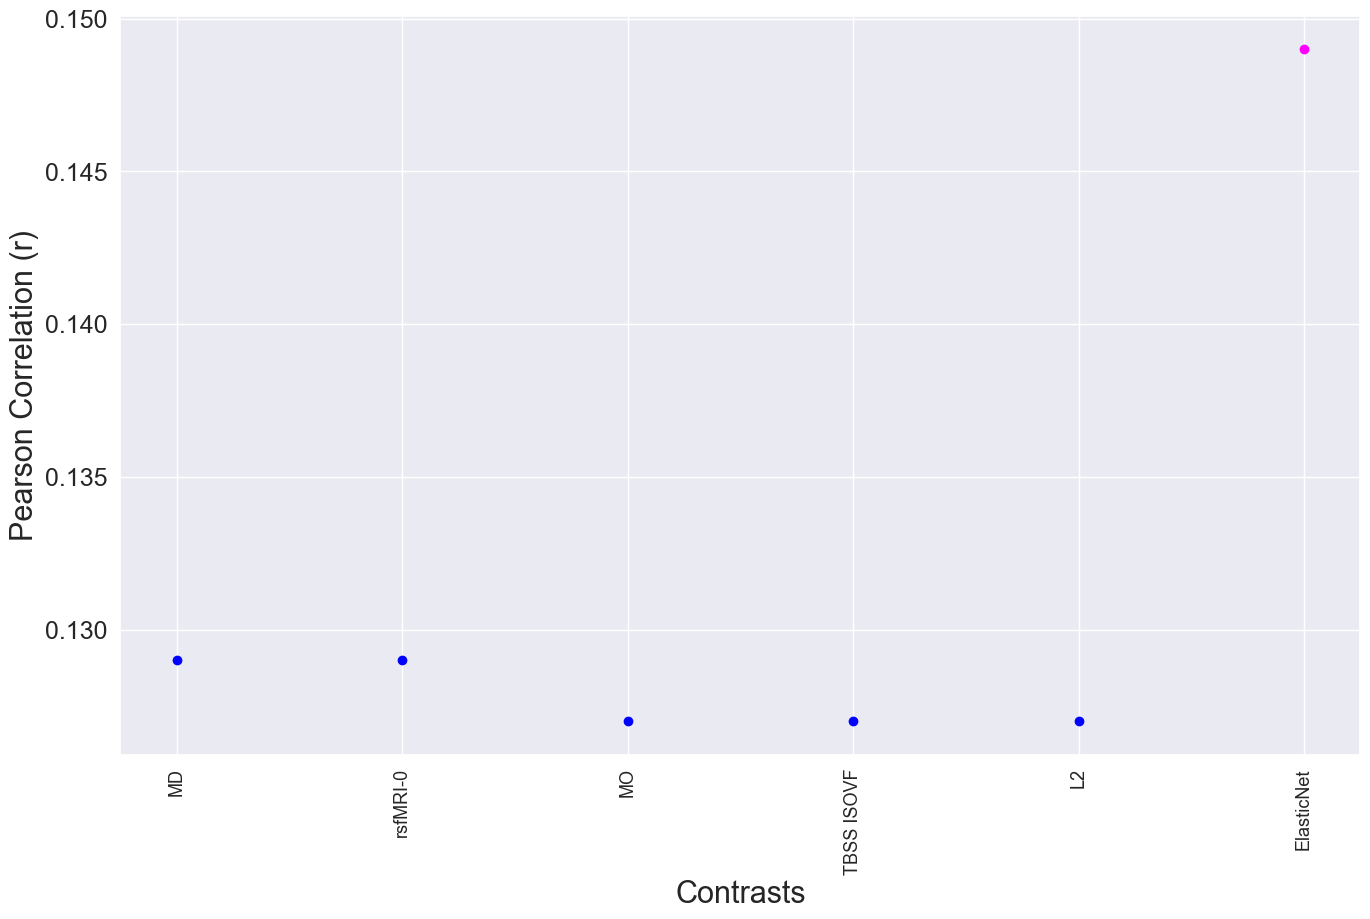

In [4]:
alcohol = [
0.129,
0.129,
0.127,
0.127,
0.127,]

alcohoNames = ['MD',
'rsfMRI-0',
'MO',
'TBSS ISOVF',
'L2']

ENName = ['ElasticNet']

alcoholEN = [0.149]

title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize)

plt.scatter(np.arange(1, len(alcohol)+1),alcohol, c='blue', label='Individual\nContrasts')
plt.scatter(np.arange(len(alcohol)+1, len(alcohol)+len(alcoholEN)+1), alcoholEN, c='magenta', label='Ensembles')

names = alcohoNames + ENName

plt.xticks(np.arange(1, len(names)+1), names, rotation=90,fontsize= ticks_font_size-5 );
plt.yticks(fontsize= ticks_font_size)
plt.xlabel("Contrasts", fontsize=title_font_size)
plt.ylabel("Pearson Correlation (r)", fontsize=title_font_size)

# MAEs2 = [
#     2.713,
#     2.927,
#     2.504,
#     2.010,
#     1.998,
#     3.023,
#     3.695,
#     2.634,
#     2.447,
#     1.986,
#     1.982
# ]

# names2 = [
#     'Cluster 1',
#     'Cluster 2',
#     'Cluster 3',
#     'Cluster 4',
#     'Cluster 5',
#     'Cluster 6',
#     'Cluster 7',
#     'Cluster 8',
#     'Cluster 9',
#     'Cluster 10',
#     'Cluster 11'
# ]

    
# MAEsNN = []
# # namesNN = dfNN.modality.to_list()
# namesNN = [
#     'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
#     'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
#     'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
#     'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
#     'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
#     'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
# ]
# for idx in range(len(df)):
#     data = df.iloc[idx].dataframe.mean_age_delta.to_list()
#     MAEsNN.append(np.abs(np.array(data)).mean())
    
# # df_test = pd.DataFrame.from_dict(df_test)

# MAEs = MAEsNN + MAEsIDP + MAEs2
# names = namesNN + namesIDPs + names2

# MAEsIDP = np.array(MAEsIDP)
# MAEsNN = np.array(MAEsNN)
# MAEs2 = np.array(MAEs2)

# namesIDPs = np.array(namesIDPs)
# namesNN = np.array(namesNN)
# names2 = np.array(names2)

# MAEs = np.array(MAEs)
# names = np.array(names)

# col =[]

# for i in range(0, len(MAEs)):
#     if i<=len(MAEsNN):
#         col.append('blue')  
#     else:
#         col.append('magenta') 
        
# title_font_size=22
# ticks_font_size=18
# legend_font = 18
# figsize=(16, 9.6)

# fig = plt.figure(figsize=figsize)

# plt.scatter(np.arange(1, MAEsNN.shape[0]+1), MAEsNN, c='blue', label='Modalities')
# plt.scatter(np.arange(MAEsNN.shape[0]+1, MAEsNN.shape[0]+MAEsIDP.shape[0]+1), MAEsIDP, c='magenta', label='Ensembles')
# plt.scatter(np.arange(MAEsNN.shape[0]+MAEsIDP.shape[0]+1, 
#                       MAEsNN.shape[0]+MAEsIDP.shape[0]+MAEs2.shape[0]+1),
#             MAEs2, c='green', label='Ensemble\nClusters')
# plt.xticks(np.arange(1, MAEs.shape[0]+1), names, rotation=90,fontsize= ticks_font_size-5 );
# plt.yticks(fontsize= ticks_font_size)
# plt.xlabel("Inputs", fontsize=title_font_size)
# plt.ylabel("MAE", fontsize=title_font_size)
# plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axhline(y=6.253, color='r', linestyle='dashed', label='Mean Age\nFailure Case', linewidth=2)
# plt.axvline(x=57.5, color='k', linestyle='dotted', linewidth=2);
# plt.axvline(x=62.5, color='k', linestyle='dotted', linewidth=2);
# # plt.axvline(x=58.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# # plt.axvline(x=65.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# # plt.axvline(x=67.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# # plt.axvline(x=68.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);

# plt.legend(loc=1, fontsize=legend_font)

# plt.ylim([1.5, 6.5])
# plt.title('Female Subjects', fontsize=title_font_size)

# fig.savefig('Female_MAE_ensemble_predictions.png', bbox_inches='tight')